In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conda list env

# packages in environment at C:\Users\ARMAN\anaconda3\envs\projet_7_OC:
#
# Name                    Version                   Build  Channel
python-dotenv             1.0.0                    pypi_0    pypi
virtualenv                20.25.0                  pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [3]:
# on agrandit la fenretre de lecture
pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_colwidth", 250)

# I) Importation des données

In [4]:
TRAIN = pd.read_csv("df_train.csv")
TRAIN.head()

,EXT_SOURCE_1,EXT_SOURCE_3,CREDIT_TYPE_Microloansum,DAYS_CREDITmean,CREDIT_ACTIVE_Activesum,EXT_SOURCE_2,DAYS_CREDITmax,NAME_CONTRACT_STATUS_Refusedmedian_y,DAYS_CREDIT_UPDATEmax,NAME_CONTRACT_STATUS_Refusedmean_y,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_STATUS_Approvedmedian,AMT_PAYMENTmin,AMT_CREDIT_MAX_OVERDUEmean,AMT_CREDIT_SUM_DEBTmean,AMT_PAYMENTmedian,CODE_REJECT_REASON_SCOFRsum,AMT_DOWN_PAYMENTsum,NAME_PRODUCT_TYPE_walk-insum,DAYS_ENTRY_PAYMENTmin,DAYS_LAST_PHONE_CHANGE,DAYS_FIRST_DRAWINGsum,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,TARGET
0,0.083037,0.139376,0.000000,-874.000000,2.000000,0.262949,-103.000000,0.0,-7.000000,0.000000,0.0,1.0,9251.775,1681.029000,49156.200000,9251.775,0.0,0.00,0.0,-587.0,-1134.0,365243.0,-2120.0,2.0,1.0
1,0.311267,0.510392,0.000000,-1400.750000,1.000000,0.622246,-606.000000,0.0,-43.000000,0.000000,0.0,1.0,6662.970,0.000000,0.000000,64275.615,0.0,6885.00,0.0,-2324.0,-828.0,1095729.0,-291.0,1.0,0.0
2,0.518220,0.729567,0.000000,-867.000000,0.000000,0.555912,-408.000000,0.0,-382.000000,0.000000,0.0,1.0,5357.250,0.000000,0.000000,5357.250,0.0,4860.00,0.0,-795.0,-815.0,365243.0,-2531.0,2.0,0.0
3,0.543395,0.515490,0.020035,-996.380945,1.760928,0.650442,-491.670292,0.0,-148.028449,0.111111,0.0,1.0,2482.920,10346.485631,193357.438533,29027.520,0.0,69680.34,0.0,-575.0,-617.0,1460972.0,-2437.0,2.0,0.0
4,0.416030,0.620638,0.000000,-1149.000000,0.000000,0.322738,-1149.000000,0.0,-783.000000,0.000000,1.0,1.0,0.180,0.000000,0.000000,16037.640,0.0,6781.50,1.0,-2318.0,-1106.0,1826215.0,-3458.0,2.0,0.0


In [5]:
TRAIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   EXT_SOURCE_1                          307511 non-null  float64
 1   EXT_SOURCE_3                          307511 non-null  float64
 2   CREDIT_TYPE_Microloansum              307511 non-null  float64
 3   DAYS_CREDITmean                       307511 non-null  float64
 4   CREDIT_ACTIVE_Activesum               307511 non-null  float64
 5   EXT_SOURCE_2                          307511 non-null  float64
 6   DAYS_CREDITmax                        307511 non-null  float64
 7   NAME_CONTRACT_STATUS_Refusedmedian_y  307511 non-null  float64
 8   DAYS_CREDIT_UPDATEmax                 307511 non-null  float64
 9   NAME_CONTRACT_STATUS_Refusedmean_y    307511 non-null  float64
 10  REG_CITY_NOT_WORK_CITY                307511 non-null  float64
 11  

In [6]:
TRAIN.describe()

,EXT_SOURCE_1,EXT_SOURCE_3,CREDIT_TYPE_Microloansum,DAYS_CREDITmean,CREDIT_ACTIVE_Activesum,EXT_SOURCE_2,DAYS_CREDITmax,NAME_CONTRACT_STATUS_Refusedmedian_y,DAYS_CREDIT_UPDATEmax,NAME_CONTRACT_STATUS_Refusedmean_y,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_STATUS_Approvedmedian,AMT_PAYMENTmin,AMT_CREDIT_MAX_OVERDUEmean,AMT_CREDIT_SUM_DEBTmean,AMT_PAYMENTmedian,CODE_REJECT_REASON_SCOFRsum,AMT_DOWN_PAYMENTsum,NAME_PRODUCT_TYPE_walk-insum,DAYS_ENTRY_PAYMENTmin,DAYS_LAST_PHONE_CHANGE,DAYS_FIRST_DRAWINGsum,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,TARGET
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000
mean,0.502994,0.514788,0.034121,-1075.177376,2.041166,5.143947e-01,-489.308236,0.057187,-141.473636,0.110469,0.230454,0.786323,5.264988e+03,6.223502e+03,1.599833e+05,1.255643e+04,0.037294,1.512218e+04,0.439630,-1579.430454,-962.858613,9.982857e+05,-2994.202373,2.031521,0.080729
std,0.154098,0.181117,0.448603,527.928782,1.661726,1.908888e-01,498.542243,0.205353,323.171527,0.179549,0.421124,0.366563,1.405372e+04,2.370221e+05,4.815991e+05,1.742049e+04,0.300067,3.863775e+04,1.068103,895.291380,826.807148,6.997697e+05,1509.450419,0.502737,0.272419
min,-0.506987,0.000527,-0.438311,-2922.000000,-4.575989,8.173617e-08,-2922.000000,-0.008688,-41890.000000,-0.035138,0.000000,0.000000,0.000000e+00,-2.659327e+04,-1.083615e+06,4.500000e-02,-0.095230,-4.500000e-01,-0.018635,-4921.000000,-4292.000000,-1.097240e+06,-7197.000000,1.000000,0.000000
25%,0.416497,0.400144,0.000000,-1375.118709,1.000000,3.928459e-01,-568.000000,0.000000,-134.849362,0.000000,0.000000,0.500000,4.936500e+01,0.000000e+00,3.138361e+03,5.724945e+03,0.000000,0.000000e+00,0.000000,-2451.000000,-1570.000000,3.652430e+05,-4299.000000,2.000000,0.000000
50%,0.511287,0.530979,0.000000,-1043.333333,2.000000,5.657412e-01,-366.000000,0.000000,-24.000000,0.000000,0.000000,1.000000,2.852190e+03,1.252598e+03,6.818250e+04,9.465750e+03,0.000000,6.988140e+03,0.000000,-1491.000000,-757.000000,7.304860e+05,-3254.000000,2.000000,0.000000
75%,0.590488,0.650207,0.000000,-715.130751,3.000000,6.634560e-01,-166.000000,0.000000,-10.000000,0.181818,0.000000,1.000000,7.058520e+03,6.975000e+03,1.715271e+05,1.448406e+04,0.000000,1.741500e+04,0.508699,-757.000000,-274.000000,1.458440e+06,-1720.000000,2.000000,0.000000
max,1.836193,2.007334,79.000000,0.000000,32.000000,8.549997e-01,101.536183,1.000000,372.000000,1.000000,1.000000,1.217313,2.504590e+06,1.159872e+08,4.365000e+07,2.504590e+06,28.000000,4.037850e+06,42.000000,-3.000000,0.000000,9.131075e+06,0.000000,3.000000,1.000000


In [7]:
TEST = pd.read_csv("df_test.csv")
TEST.head()

,EXT_SOURCE_1,EXT_SOURCE_3,CREDIT_TYPE_Microloansum,DAYS_CREDITmean,CREDIT_ACTIVE_Activesum,EXT_SOURCE_2,DAYS_CREDITmax,NAME_CONTRACT_STATUS_Refusedmedian_y,DAYS_CREDIT_UPDATEmax,NAME_CONTRACT_STATUS_Refusedmean_y,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_STATUS_Approvedmedian,AMT_PAYMENTmin,AMT_CREDIT_MAX_OVERDUEmean,AMT_CREDIT_SUM_DEBTmean,AMT_PAYMENTmedian,CODE_REJECT_REASON_SCOFRsum,AMT_DOWN_PAYMENTsum,NAME_PRODUCT_TYPE_walk-insum,DAYS_ENTRY_PAYMENTmin,DAYS_LAST_PHONE_CHANGE,DAYS_FIRST_DRAWINGsum,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY
0,0.752614,0.159520,0.000000,-735.000000,3.00000,0.789654,-49.000000,0.0,-6.00000,0.0,0.0,1.0,3951.000,-5800.900052,85240.928571,3980.925,0.0,2520.0,0.0,-2916.0,-1740.0,365243.0,-812.0,2.0
1,0.564990,0.432962,0.000000,-190.666667,2.00000,0.291656,-62.000000,0.0,-11.00000,0.0,0.0,0.5,4813.200,0.000000,189469.500000,4813.200,0.0,4464.0,0.0,-736.0,0.0,365243.0,-1623.0,2.0
2,0.556591,0.610991,0.000000,-1737.500000,0.00000,0.699787,-1210.000000,0.0,-4.00000,0.0,0.0,1.0,6.165,19305.000000,0.000000,688.545,0.0,6750.0,0.0,-2705.0,-856.0,1095729.0,-3503.0,2.0
3,0.525734,0.612704,0.000000,-1401.750000,5.00000,0.509677,-269.000000,0.0,-20.00000,0.0,0.0,1.0,1.170,0.000000,18630.450000,4650.300,0.0,11250.0,0.0,-1785.0,-1805.0,729163.0,-4208.0,2.0
4,0.202145,0.442012,0.088898,-834.624655,1.85742,0.425687,-437.765426,0.0,-105.14495,0.0,1.0,0.5,11097.450,5706.640815,184224.963513,11100.600,0.0,8095.5,0.0,-802.0,-821.0,365243.0,-4262.0,2.0


In [8]:
TEST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   EXT_SOURCE_1                          48744 non-null  float64
 1   EXT_SOURCE_3                          48744 non-null  float64
 2   CREDIT_TYPE_Microloansum              48744 non-null  float64
 3   DAYS_CREDITmean                       48744 non-null  float64
 4   CREDIT_ACTIVE_Activesum               48744 non-null  float64
 5   EXT_SOURCE_2                          48744 non-null  float64
 6   DAYS_CREDITmax                        48744 non-null  float64
 7   NAME_CONTRACT_STATUS_Refusedmedian_y  48744 non-null  float64
 8   DAYS_CREDIT_UPDATEmax                 48744 non-null  float64
 9   NAME_CONTRACT_STATUS_Refusedmean_y    48744 non-null  float64
 10  REG_CITY_NOT_WORK_CITY                48744 non-null  float64
 11  NAME_CONTRACT_S

In [9]:
TEST.describe()

,EXT_SOURCE_1,EXT_SOURCE_3,CREDIT_TYPE_Microloansum,DAYS_CREDITmean,CREDIT_ACTIVE_Activesum,EXT_SOURCE_2,DAYS_CREDITmax,NAME_CONTRACT_STATUS_Refusedmedian_y,DAYS_CREDIT_UPDATEmax,NAME_CONTRACT_STATUS_Refusedmean_y,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_STATUS_Approvedmedian,AMT_PAYMENTmin,AMT_CREDIT_MAX_OVERDUEmean,AMT_CREDIT_SUM_DEBTmean,AMT_PAYMENTmedian,CODE_REJECT_REASON_SCOFRsum,AMT_DOWN_PAYMENTsum,NAME_PRODUCT_TYPE_walk-insum,DAYS_ENTRY_PAYMENTmin,DAYS_LAST_PHONE_CHANGE,DAYS_FIRST_DRAWINGsum,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY
count,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48744.000000,48744.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,4.874400e+04,48744.000000,48744.000000
mean,0.502153,0.503595,0.079855,-1081.960429,2.077494,0.518022,-501.758423,0.052261,-129.596520,0.114545,0.224664,0.750066,5814.559383,5.230484e+03,1.700755e+05,13820.117383,0.040418,1.603889e+04,0.460075,-1620.757301,-1077.766228,1.035179e+06,-3051.712949,2.012596
std,0.163079,0.176288,0.771831,496.241400,1.698091,0.181265,474.047162,0.199762,296.981562,0.178209,0.417365,0.396364,14810.751227,5.547681e+04,5.949608e+05,19142.481524,0.312542,4.878329e+04,1.070674,915.913831,878.920740,7.321226e+05,1569.276709,0.515804
min,0.013458,0.000527,-0.737615,-2921.000000,-0.162429,0.000008,-2921.000000,0.000000,-2907.000000,0.000000,0.000000,0.000000,0.000000,-5.610168e+04,-3.243641e+05,0.090000,-0.069296,0.000000e+00,0.000000,-3227.230270,-4361.000000,-2.920000e+03,-6348.000000,-1.000000
25%,0.411998,0.392774,0.000000,-1365.805882,1.000000,0.408082,-594.419223,0.000000,-122.062326,0.000000,0.000000,0.500000,47.418750,0.000000e+00,4.498200e+03,6024.701250,0.000000,0.000000e+00,0.000000,-2565.000000,-1766.250000,3.652430e+05,-4448.000000,2.000000
50%,0.508553,0.515350,0.000000,-1054.239802,2.000000,0.558731,-380.000000,0.000000,-21.000000,0.000000,0.000000,1.000000,2567.002500,0.000000e+00,7.218560e+04,9864.675000,0.000000,6.311250e+03,0.000000,-1568.000000,-863.000000,7.304860e+05,-3234.000000,2.000000
75%,0.593282,0.634706,0.000000,-753.666667,3.000000,0.658480,-203.000000,0.000000,-9.000000,0.200000,0.000000,1.000000,7529.423339,5.320542e+03,1.793316e+05,15878.351250,0.000000,1.844550e+04,1.000000,-751.000000,-363.000000,1.460972e+06,-1706.000000,2.000000
max,1.201883,1.005447,39.000000,0.000000,19.000000,0.855000,64.594340,1.000000,152.797034,1.000000,1.000000,1.000000,905408.595000,7.431934e+06,5.175000e+07,946490.062500,14.000000,6.441543e+06,32.000000,-5.000000,0.000000,6.939617e+06,0.000000,3.000000


# II) Modélisation

## II.1) Préparation et Normalisation

In [10]:
# importation des librairies
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
# metrics
from sklearn.metrics import (accuracy_score, roc_auc_score, 
recall_score, confusion_matrix, ConfusionMatrixDisplay, get_scorer_names, f1_score)
# validation
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import time
# Sélection hypers paramètres
from sklearn.model_selection import GridSearchCV
# Modèles
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
# training target et features
features = TRAIN.columns.to_list()[0:-1]
X = TRAIN[features]
y = TRAIN["TARGET"]

In [12]:
# Définition des sets de train et set de tests
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [13]:
# Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## II.2) Recherche des meilleurs hyperparamètres

In [14]:
def optim_params(algo, parameters) : 
    # T0
    T0 = time.time()
    # Application SMOTE
    pipeline = make_pipeline(SMOTE(), algo)  
    # REcherche des meilleurs paramètres
    grid = GridSearchCV(pipeline, 
                        parameters, 
                        cv = 4,
                        scoring = ["roc_auc","accuracy","recall"], 
                        n_jobs = 2,
                        refit ="roc_auc")
    # training
    grid.fit(X_train,y_train)                                  
    TTot = time.time() - T0
    print (f"durée {TTot} s")
    return grid

In [169]:
# DummyClassifier

# Paramètres
parameters_dummy = {'dummyclassifier__strategy' : ["most_frequent", "prior", 
                                            "stratified", "uniform"]}
# fonction grid_search
grid_dum = optim_params(DummyClassifier(random_state = 0), parameters_dummy)

durée 8.487030744552612 s


In [170]:
# LogisticRegression

# Paramètres
parameters_LR = {'logisticregression__penalty' : ["l2", None], 
                 'logisticregression__max_iter' : np.arange(0, 300,50)}

# fonction grid_search
grid_LR = optim_params(LogisticRegression(random_state = 0), parameters_LR)

durée 36.12671399116516 s


In [171]:
# LGBMClassifier
# Paramètres
parameters_LGMBC = {"lgbmclassifier__learning_rate" : [0.1,0.3,0.6,0.9],
 "lgbmclassifier__n_estimators" : [50,100,150]}
# fonction grid_search
grid_LGMBC = optim_params(LGBMClassifier(random_state = 0), parameters_LGMBC)

[LightGBM] [Info] Number of positive: 226038, number of negative: 226038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 452076, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
durée 97.2552285194397 s


In [172]:
grid_LGMBC.best_score_

0.870352276029035

In [186]:
# DecisionTreeClassifier
# Paramètres
parameters_Dtree = {'decisiontreeclassifier__min_samples_split' : [2,3,4],
 'decisiontreeclassifier__min_samples_leaf' : [1,2,3]}
# fonction grid_search
grid_Dtree = optim_params(DecisionTreeClassifier(random_state = 0), 
                          parameters_Dtree)

durée 406.52227544784546 s


In [187]:
grid_Dtree.best_score_

0.6999268914010783

In [188]:
# best score
pd.DataFrame((grid_dum.best_score_,grid_LR.best_score_,grid_LGMBC.best_score_,grid_Dtree.best_score_),index = ["DUM","LR","LGMBC",'DTREE'], columns = ["roc_auc"])

,roc_auc
DUM,0.500488
LR,0.781102
LGMBC,0.870352
DTREE,0.699927


In [189]:
# best params
print(grid_dum.best_params_)
print(grid_LR.best_params_)
print(grid_LGMBC.best_params_)
print(grid_Dtree.best_params_)

{'dummyclassifier__strategy': 'stratified'}
{'logisticregression__max_iter': 50, 'logisticregression__penalty': None}
{'lgbmclassifier__learning_rate': 0.3, 'lgbmclassifier__n_estimators': 150}
{'decisiontreeclassifier__min_samples_leaf': 3, 'decisiontreeclassifier__min_samples_split': 3}


## II.3) Experimentations meilleurs paramètres AUC

In [17]:
import mlflow
from mlflow.models import infer_signature

In [195]:
# tracking URI
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

In [193]:
# DummyClassifier
# Modèle
T0 = time.time()
model_dum = make_pipeline(SMOTE(), DummyClassifier(random_state = 0, 
                                                   strategy = 'stratified'))
# Training
model_dum.fit(X_train,y_train)
# Prédiction
y_pred_dum = model_dum.predict(X_test)
TTot_dum = time.time()-T0
# metriques
accuracy_dum = accuracy_score(y_test, y_pred_dum)
auc_dum = roc_auc_score(y_test, y_pred_dum)
matrix_confusion_dum = confusion_matrix(y_test, y_pred_dum, labels = model_dum.classes_)
f1_dum = f1_score(y_test,y_pred_dum)


In [194]:
accuracy_dum

0.49926019868949484

In [195]:
auc_dum

0.5004929187796181

In [196]:
f1_dum

0.13663760477698972

In [197]:
TTot_dum

0.7406985759735107

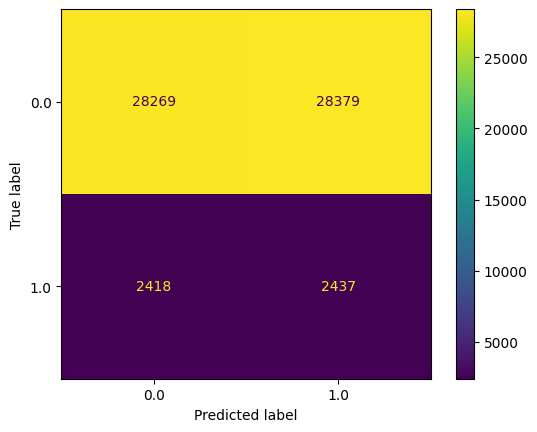

In [198]:
disp = ConfusionMatrixDisplay(matrix_confusion_dum, 
                              display_labels = model_dum.classes_)
disp.plot()

In [199]:
mlflow.set_experiment("DummyClassifier")

2024/01/02 21:28:29 INFO mlflow.tracking.fluent: Experiment with name 'DummyClassifier' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/101534954718809339', creation_time=1704227310004, experiment_id='101534954718809339', last_update_time=1704227310004, lifecycle_stage='active', name='DummyClassifier', tags={}>

In [200]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'strategy' : 'stratified'})
    mlflow.log_params({'random_state' : 0})

    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_dum)
    mlflow.log_metric('roc_auc', auc_dum)
    mlflow.log_metric('durée', TTot_dum)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "DummyClassifier_P7_AF")

    # Infer the model signature
    signature = infer_signature(X_train, model_dum.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model = model_dum,
        artifact_path="model_dum",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_dum")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'model_dum' already exists. Creating a new version of this model...
2024/01/02 21:28:45 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_dum, version 3
Created version '3' of model 'model_dum'.


In [201]:
# LogisticRegression
# Modèle
model_LR = make_pipeline(SMOTE(),LogisticRegression(random_state = 0, 
                                                    max_iter = 100, 
                                                    penalty = "l2"))
# Training
T0 = time.time()
model_LR.fit(X_train,y_train)
# Prédiction
y_pred_LR = model_LR.predict(X_test)
TTot_LR = time.time()-T0
# metriques
accuracy_LR = accuracy_score(y_test, y_pred_LR)
auc_LR = roc_auc_score(y_test, y_pred_LR)
matrix_confusion_LR = confusion_matrix(y_test, y_pred_LR, labels = model_LR.classes_)
f1_LR = f1_score(y_test, y_pred_LR)

In [202]:
accuracy_LR

0.71747719623433

In [203]:
auc_LR

0.7116061410039574

In [204]:
f1_LR

0.28251713601453465

In [205]:
TTot_LR

1.2533109188079834

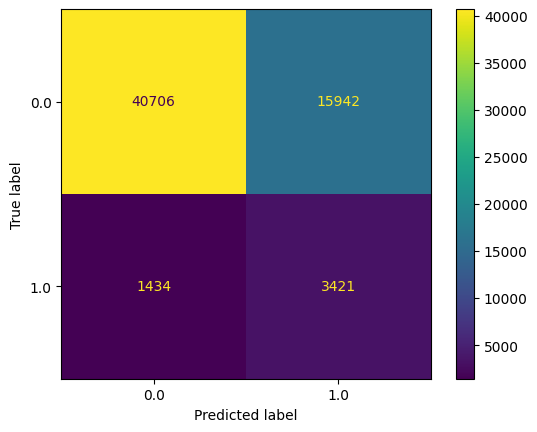

In [206]:
disp = ConfusionMatrixDisplay(matrix_confusion_LR, 
                              display_labels = model_LR.classes_)
disp.plot()

In [207]:
mlflow.set_experiment("LogisticRegression")

2024/01/02 21:28:46 INFO mlflow.tracking.fluent: Experiment with name 'LogisticRegression' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/888093429602863663', creation_time=1704227326702, experiment_id='888093429602863663', last_update_time=1704227326702, lifecycle_stage='active', name='LogisticRegression', tags={}>

In [208]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters

    mlflow.log_params({'max_iter' : 100})
    mlflow.log_params({'random_state' : 0})
    mlflow.log_params({'penalty' : 'l2'})

    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_LR)
    mlflow.log_metric('roc_auc', auc_LR)
    mlflow.log_metric('durée', TTot_LR)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "LogisticRegression_P7_AF")

    # Infer the model signature
    signature = infer_signature(X_train, model_LR.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model = model_LR,
        artifact_path="model_LR",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_LR")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'model_LR' already exists. Creating a new version of this model...
2024/01/02 21:28:59 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_LR, version 3
Created version '3' of model 'model_LR'.


In [209]:
# LGBMClassifier
# Modèle
model_LGMBC = make_pipeline(SMOTE(),LGBMClassifier(random_state = 0, 
                                                   learning_rate = 0.3, 
                                                   n_estimators = 150))
# Training
T0 = time.time()
model_LGMBC.fit(X_train,y_train)
# Prédiction
y_pred_LGMBC = model_LGMBC.predict(X_test)
TTot_LGMBC = time.time()-T0
# metriques
accuracy_LGMBC = accuracy_score(y_test, y_pred_LGMBC)
auc_LGMBC = roc_auc_score(y_test, y_pred_LGMBC)
matrix_confusion_LGMBC = confusion_matrix(y_test, y_pred_LGMBC, labels = model_LGMBC.classes_)
f1_LGMBC = f1_score(y_test, y_pred_LGMBC)

[LightGBM] [Info] Number of positive: 226038, number of negative: 226038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 452076, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [210]:
accuracy_LGMBC

0.9311253109604409

In [211]:
auc_LGMBC

0.6577205671142994

In [212]:
f1_LGMBC

0.4329317269076305

In [213]:
TTot_LGMBC

2.9899702072143555

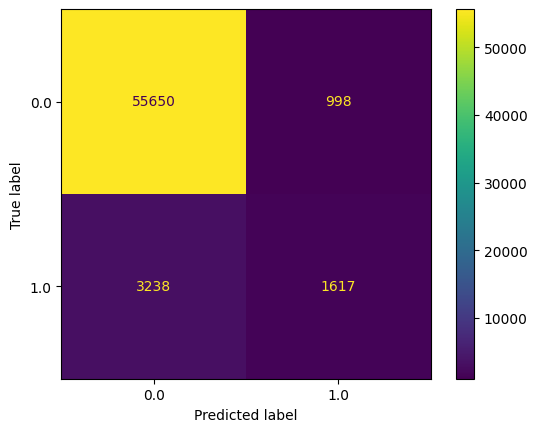

In [214]:
disp = ConfusionMatrixDisplay(matrix_confusion_LGMBC, 
                              display_labels = model_LGMBC.classes_)
disp.plot()

In [215]:
mlflow.set_experiment("LGMBC")

2024/01/02 21:29:03 INFO mlflow.tracking.fluent: Experiment with name 'LGMBC' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/706831843836183211', creation_time=1704227343121, experiment_id='706831843836183211', last_update_time=1704227343121, lifecycle_stage='active', name='LGMBC', tags={}>

In [216]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'n_estimators' : 150})
    mlflow.log_params({'random_state' : 0})
    mlflow.log_params({'learning_rate' : 0.3})

    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_LGMBC)
    mlflow.log_metric('roc_auc', auc_LGMBC)
    mlflow.log_metric('durée', auc_LGMBC)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "LGMBC_P7_AF")

    # Infer the model signature
    signature = infer_signature(X_train, model_LGMBC.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model_LGMBC,
        artifact_path="model_LGMBC",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_LGMBC")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'model_LGMBC' already exists. Creating a new version of this model...
2024/01/02 21:29:17 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_LGMBC, version 3
Created version '3' of model 'model_LGMBC

In [222]:
# DecisionTreeclassifier
# Modèle
model_Dtree = make_pipeline(SMOTE(),DecisionTreeClassifier(random_state = 0, 
                                                   min_samples_leaf = 3, 
                                                   min_samples_split = 3))
# Training
T0 = time.time()
model_Dtree.fit(X_train,y_train)
# Prédiction
y_pred_Dtree = model_Dtree.predict(X_test)
TTot_Dtree = time.time()-T0
# metriques
accuracy_Dtree = accuracy_score(y_test, y_pred_Dtree)
auc_Dtree = roc_auc_score(y_test, y_pred_Dtree)
matrix_confusion_Dtree = confusion_matrix(y_test, y_pred_Dtree, labels = model_Dtree.classes_)
f1_Dtree = f1_score(y_test, y_pred_Dtree)

In [223]:
accuracy_Dtree

0.8589337105507049

In [224]:
auc_Dtree

0.6780404175546432

In [225]:
f1_Dtree

0.34143008957036586

In [226]:
TTot_Dtree

25.08725595474243

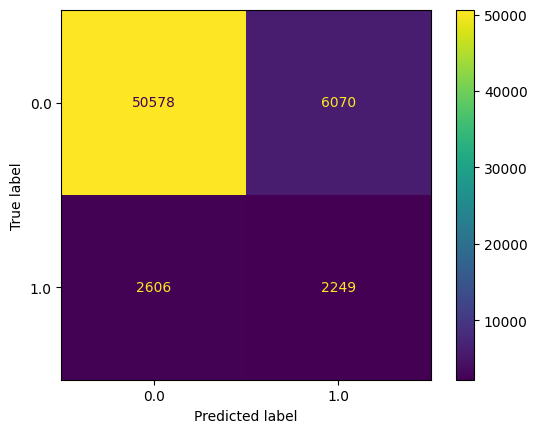

In [227]:
disp = ConfusionMatrixDisplay(matrix_confusion_Dtree, 
                              display_labels = model_Dtree.classes_)
disp.plot()

In [228]:
mlflow.set_experiment("Dtree")

2024/01/02 21:33:16 INFO mlflow.tracking.fluent: Experiment with name 'Dtree' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/105389232120327589', creation_time=1704227596186, experiment_id='105389232120327589', last_update_time=1704227596186, lifecycle_stage='active', name='Dtree', tags={}>

In [229]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'min_samples_leaf' : 3})
    mlflow.log_params({'min_samples_split' : 3})


    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_Dtree)
    mlflow.log_metric('roc_auc', auc_Dtree)
    mlflow.log_metric('durée', auc_Dtree)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Dtree_P7_AF")

    # Infer the model signature
    signature = infer_signature(X_train, model_Dtree.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model_Dtree,
        artifact_path="model_Dtree",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_Dtree")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'model_Dtree'.
2024/01/02 21:34:53 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_Dtree, version 1
Created version '1' of model 'model_Dtree'.


# III) Optimisation métier

In [15]:
from sklearn.metrics import fbeta_score, make_scorer

In [16]:
def optim_params_metier(algo, parameters, score) : 
    # T0
    T0 = time.time()
    # Application SMOTE
    pipeline = make_pipeline(SMOTE(), algo)  
    # REcherche des meilleurs paramètres
    grid = GridSearchCV(pipeline, 
                        parameters, 
                        cv = 4,
                        scoring = score, 
                        n_jobs = 2)
    # training
    grid.fit(X_train,y_train)                                  
    TTot = time.time() - T0
    print (f"durée {TTot} s")
    return grid

## III.1) beta_score

### III.1.1) Recherche meilleurs hypersparamètres betascore

In [332]:
# paramétrage des métiques
beta_two_score = make_scorer(fbeta_score, beta = 2)

In [333]:
# DummyClassifier

# Paramètres
parameters_dummy = {'dummyclassifier__strategy' : ["most_frequent", "prior", 
                                            "stratified", "uniform"]}
# fonction grid_search
grid_dum = optim_params_metier(DummyClassifier(random_state = 0), parameters_dummy, 
                               beta_two_score)

durée 9.02327013015747 s


In [334]:
# LogisticRegression

# Paramètres
parameters_LR = {'logisticregression__penalty' : ["l2", None], 
                 'logisticregression__max_iter' : np.arange(0, 300,50)}

# fonction grid_search
grid_LR = optim_params_metier(LogisticRegression(random_state = 0), parameters_LR, 
                              beta_two_score)

durée 35.60421442985535 s


In [335]:
# LGBMClassifier
# Paramètres
parameters_LGMBC = {"lgbmclassifier__learning_rate" : [0.1,0.3,0.6,0.9],
 "lgbmclassifier__n_estimators" : [50,100,150]}
# fonction grid_search
grid_LGMBC = optim_params_metier(LGBMClassifier(random_state = 0), parameters_LGMBC, beta_two_score)

[LightGBM] [Info] Number of positive: 226038, number of negative: 226038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 452076, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
durée 94.51802396774292 s


In [336]:
grid_LGMBC.best_score_

0.38414649698680575

In [337]:
# DecisionTreeClassifier
# Paramètres
parameters_Dtree = {'decisiontreeclassifier__min_samples_split' : [2,3,4],
 'decisiontreeclassifier__min_samples_leaf' : [1,2,3]}
# fonction grid_search
grid_Dtree = optim_params_metier(DecisionTreeClassifier(random_state = 0), 
                          parameters_Dtree, beta_two_score)

durée 401.6587269306183 s


In [338]:
grid_Dtree.best_score_

0.3945485875142296

In [339]:
# best score
pd.DataFrame((grid_dum.best_score_,grid_LR.best_score_,grid_LGMBC.best_score_,grid_Dtree.best_score_),index = ["DUM","LR","LGMBC",'DTREE'], columns = ["beta_score"])

,beta_score
DUM,0.248921
LR,0.450416
LGMBC,0.384146
DTREE,0.394549


In [340]:
# best params
print(grid_dum.best_params_)
print(grid_LR.best_params_)
print(grid_LGMBC.best_params_)
print(grid_Dtree.best_params_)

{'dummyclassifier__strategy': 'uniform'}
{'logisticregression__max_iter': 250, 'logisticregression__penalty': None}
{'lgbmclassifier__learning_rate': 0.9, 'lgbmclassifier__n_estimators': 100}
{'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}


### III.1.2) Expérimentations meilleurs paramètres beta_score

In [341]:
# DummyClassifier
# Modèle
T0 = time.time()
model_dum = make_pipeline(SMOTE(), DummyClassifier(random_state = 0, 
                                                   strategy = 'uniform'))
# Training
model_dum.fit(X_train,y_train)
# Prédiction
y_pred_dum = model_dum.predict(X_test)
TTot_dum = time.time()-T0
# metriques
accuracy_dum = accuracy_score(y_test, y_pred_dum)
auc_dum = roc_auc_score(y_test, y_pred_dum)
matrix_confusion_dum = confusion_matrix(y_test, y_pred_dum, labels = model_dum.classes_)
f1_dum = f1_score(y_test,y_pred_dum)


In [342]:
accuracy_dum

0.4981545615661025

In [343]:
auc_dum

0.4935839893560624

In [344]:
f1_dum

0.1331273697514394

In [345]:
TTot_dum

0.7474870681762695

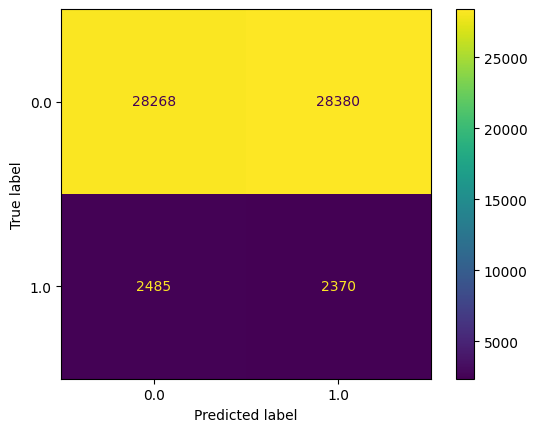

In [346]:
disp = ConfusionMatrixDisplay(matrix_confusion_dum, 
                              display_labels = model_dum.classes_)
disp.plot()

In [347]:
mlflow.set_experiment("DummyClassifier")

<Experiment: artifact_location='mlflow-artifacts:/101534954718809339', creation_time=1704227310004, experiment_id='101534954718809339', last_update_time=1704227310004, lifecycle_stage='active', name='DummyClassifier', tags={}>

In [348]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'strategy' : 'uniform'})
    mlflow.log_params({'random_state' : 0})

    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_dum)
    mlflow.log_metric('roc_auc', auc_dum)
    mlflow.log_metric('durée', TTot_dum)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "DummyClassifier_P7_AF")

    # Infer the model signature
    signature = infer_signature(X_train, model_dum.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model = model_dum,
        artifact_path="model_dum",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_dum_beta")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'model_dum_beta'.
2024/01/03 19:21:19 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_dum_beta, version 1
Created version '1' of model 'model_dum_beta'.


In [349]:
# LogisticRegression
# Modèle
model_LR = make_pipeline(SMOTE(),LogisticRegression(random_state = 0, 
                                                    max_iter = 250, 
                                                    penalty = None))
# Training
T0 = time.time()
model_LR.fit(X_train,y_train)
# Prédiction
y_pred_LR = model_LR.predict(X_test)
TTot_LR = time.time()-T0
# metriques
accuracy_LR = accuracy_score(y_test, y_pred_LR)
auc_LR = roc_auc_score(y_test, y_pred_LR)
matrix_confusion_LR = confusion_matrix(y_test, y_pred_LR, labels = model_LR.classes_)
f1_LR = f1_score(y_test, y_pred_LR)

In [350]:
accuracy_LR

0.7173308619091752

In [351]:
auc_LR

0.712091664120241

In [352]:
f1_LR

0.2827674409010273

In [353]:
TTot_LR

1.2039201259613037

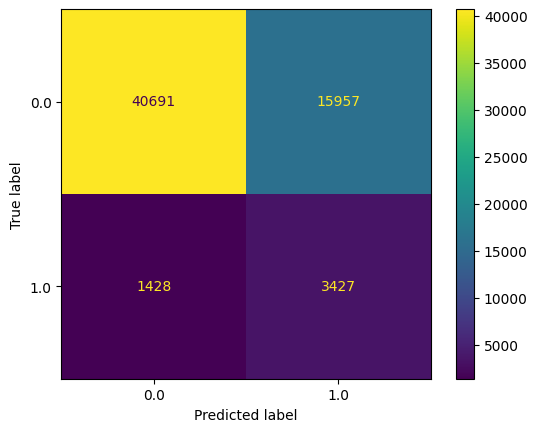

In [355]:
disp = ConfusionMatrixDisplay(matrix_confusion_LR, 
                              display_labels = model_LR.classes_)
disp.plot()

In [356]:
mlflow.set_experiment("LogisticRegression")

<Experiment: artifact_location='mlflow-artifacts:/888093429602863663', creation_time=1704227326702, experiment_id='888093429602863663', last_update_time=1704227326702, lifecycle_stage='active', name='LogisticRegression', tags={}>

In [357]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters

    mlflow.log_params({'max_iter' : 250})
    mlflow.log_params({'random_state' : 0})
    mlflow.log_params({'penalty' : None})

    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_LR)
    mlflow.log_metric('roc_auc', auc_LR)
    mlflow.log_metric('durée', TTot_LR)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "LogisticRegression_P7_AF_beta")

    # Infer the model signature
    signature = infer_signature(X_train, model_LR.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model = model_LR,
        artifact_path="model_LR",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_LR_beta")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'model_LR_beta'.
2024/01/03 19:25:03 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_LR_beta, version 1
Created version '1' of model 'model_LR_beta'.


In [17]:
# LGBMClassifier
# Modèle
model_LGMBC = make_pipeline(SMOTE(),LGBMClassifier(random_state = 0, 
                                                   learning_rate = 0.9, 
                                                   n_estimators = 100))
# Training
T0 = time.time()
model_LGMBC.fit(X_train,y_train)
# Prédiction
y_pred_LGMBC = model_LGMBC.predict(X_test)
TTot_LGMBC = time.time()-T0
# metriques
accuracy_LGMBC = accuracy_score(y_test, y_pred_LGMBC)
auc_LGMBC = roc_auc_score(y_test, y_pred_LGMBC)
matrix_confusion_LGMBC = confusion_matrix(y_test, y_pred_LGMBC, labels = model_LGMBC.classes_)
f1_LGMBC = f1_score(y_test, y_pred_LGMBC)

[LightGBM] [Info] Number of positive: 226038, number of negative: 226038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 452076, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [18]:
accuracy_LGMBC

0.9199713835097475

In [19]:
auc_LGMBC

0.6710626273788475

In [361]:
f1_LGMBC

0.42934845503992597

In [362]:
TTot_LGMBC

2.670393466949463

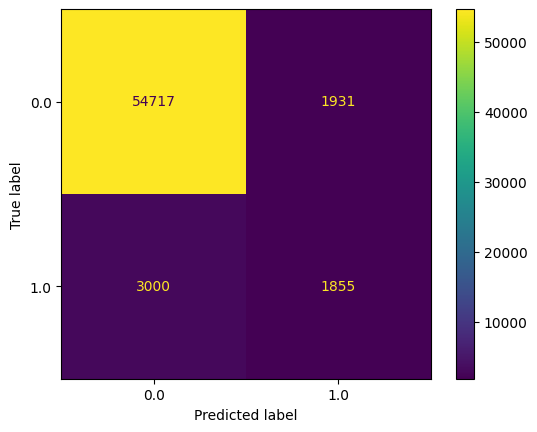

In [363]:
disp = ConfusionMatrixDisplay(matrix_confusion_LGMBC, 
                              display_labels = model_LGMBC.classes_)
disp.plot()

In [364]:
mlflow.set_experiment("LGMBC")

<Experiment: artifact_location='mlflow-artifacts:/706831843836183211', creation_time=1704227343121, experiment_id='706831843836183211', last_update_time=1704227343121, lifecycle_stage='active', name='LGMBC', tags={}>

In [365]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'n_estimators' : 100})
    mlflow.log_params({'random_state' : 0})
    mlflow.log_params({'learning_rate' : 0.9})

    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_LGMBC)
    mlflow.log_metric('roc_auc', auc_LGMBC)
    mlflow.log_metric('durée', auc_LGMBC)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "LGMBC_P7_AF_beta")

    # Infer the model signature
    signature = infer_signature(X_train, model_LGMBC.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model_LGMBC,
        artifact_path="model_LGMBC",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_LGMBC_beta")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'model_LGMBC_beta'.
2024/01/03 19:30:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_LGMBC_beta, version 1
Created version '1' of model 'model_LGMBC_beta'.


In [366]:
# DecisionTreeclassifier
# Modèle
model_Dtree = make_pipeline(SMOTE(),DecisionTreeClassifier(random_state = 0, 
                                                   min_samples_leaf = 1, 
                                                   min_samples_split = 2))
# Training
T0 = time.time()
model_Dtree.fit(X_train,y_train)
# Prédiction
y_pred_Dtree = model_Dtree.predict(X_test)
TTot_Dtree = time.time()-T0
# metriques
accuracy_Dtree = accuracy_score(y_test, y_pred_Dtree)
auc_Dtree = roc_auc_score(y_test, y_pred_Dtree)
matrix_confusion_Dtree = confusion_matrix(y_test, y_pred_Dtree, labels = model_Dtree.classes_)
f1_Dtree = f1_score(y_test, y_pred_Dtree)

In [367]:
accuracy_Dtree

0.8516657724013462

In [368]:
auc_Dtree

0.6759782037366352

In [369]:
f1_Dtree

0.3321865163604421

In [370]:
TTot_Dtree

36.67571139335632

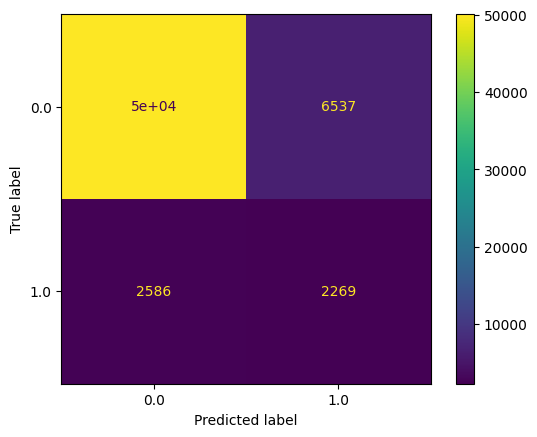

In [371]:
disp = ConfusionMatrixDisplay(matrix_confusion_Dtree, 
                              display_labels = model_Dtree.classes_)
disp.plot()

In [372]:
mlflow.set_experiment("Dtree")

<Experiment: artifact_location='mlflow-artifacts:/105389232120327589', creation_time=1704227596186, experiment_id='105389232120327589', last_update_time=1704227596186, lifecycle_stage='active', name='Dtree', tags={}>

In [373]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'min_samples_leaf' : 1})
    mlflow.log_params({'min_samples_split' : 2})


    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_Dtree)
    mlflow.log_metric('roc_auc', auc_Dtree)
    mlflow.log_metric('durée', auc_Dtree)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Dtree_P7_AF_beta")

    # Infer the model signature
    signature = infer_signature(X_train, model_Dtree.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model_Dtree,
        artifact_path="model_Dtree",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_Dtree_beta")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'model_Dtree_beta'.
2024/01/03 19:42:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_Dtree_beta, version 1
Created version '1' of model 'model_Dtree_beta'.


## III.2) recall

### III.1.1) Recherche meilleurs hypersparamètres recall

In [374]:
# DummyClassifier

# Paramètres
parameters_dummy = {'dummyclassifier__strategy' : ["most_frequent", "prior", 
                                            "stratified", "uniform"]}
# fonction grid_search
grid_dum = optim_params_metier(DummyClassifier(random_state = 0), parameters_dummy, 
                              "recall")

durée 8.562100172042847 s


In [382]:
# LogisticRegression

# Paramètres
parameters_LR = {'logisticregression__penalty' : ["l2", None], 
                 'logisticregression__max_iter' : np.arange(0, 600,50)}

# fonction grid_search
grid_LR = optim_params_metier(LogisticRegression(random_state = 0), parameters_LR, 
                              "recall")

durée 84.2001485824585 s


C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [376]:
# LGBMClassifier
# Paramètres
parameters_LGMBC = {"lgbmclassifier__learning_rate" : [0.1,0.3,0.6,0.9],
 "lgbmclassifier__n_estimators" : [50,100,150]}
# fonction grid_search
grid_LGMBC = optim_params_metier(LGBMClassifier(random_state = 0), parameters_LGMBC,"recall")

[LightGBM] [Info] Number of positive: 226038, number of negative: 226038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 452076, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
durée 107.55019998550415 s


In [377]:
grid_LGMBC.best_score_

0.3753125670008525

In [378]:
# DecisionTreeClassifier
# Paramètres
parameters_Dtree = {'decisiontreeclassifier__min_samples_split' : [2,3,4],
 'decisiontreeclassifier__min_samples_leaf' : [1,2,3]}
# fonction grid_search
grid_Dtree = optim_params_metier(DecisionTreeClassifier(random_state = 0), 
                          parameters_Dtree, "recall")

durée 511.253723859787 s


In [379]:
grid_Dtree.best_score_

0.45282871179908285

In [383]:
# best score
pd.DataFrame((grid_dum.best_score_,grid_LR.best_score_,grid_LGMBC.best_score_,grid_Dtree.best_score_),index = ["DUM","LR","LGMBC",'DTREE'], columns = ["recall"])

,recall
DUM,0.505759
LR,0.799249
LGMBC,0.375313
DTREE,0.452829


In [384]:
# best params
print(grid_dum.best_params_)
print(grid_LR.best_params_)
print(grid_LGMBC.best_params_)
print(grid_Dtree.best_params_)

{'dummyclassifier__strategy': 'uniform'}
{'logisticregression__max_iter': 0, 'logisticregression__penalty': 'l2'}
{'lgbmclassifier__learning_rate': 0.9, 'lgbmclassifier__n_estimators': 150}
{'decisiontreeclassifier__min_samples_leaf': 3, 'decisiontreeclassifier__min_samples_split': 4}


### III.1.2) Expérimentations meilleurs paramètres recall

In [385]:
# DummyClassifier
# Modèle
T0 = time.time()
model_dum = make_pipeline(SMOTE(), DummyClassifier(random_state = 0, 
                                                   strategy = 'uniform'))
# Training
model_dum.fit(X_train,y_train)
# Prédiction
y_pred_dum = model_dum.predict(X_test)
TTot_dum = time.time()-T0
# metriques
accuracy_dum = accuracy_score(y_test, y_pred_dum)
auc_dum = roc_auc_score(y_test, y_pred_dum)
matrix_confusion_dum = confusion_matrix(y_test, y_pred_dum, labels = model_dum.classes_)
f1_dum = f1_score(y_test,y_pred_dum)


In [386]:
accuracy_dum

0.4981545615661025

In [387]:
auc_dum

0.4935839893560624

In [388]:
f1_dum

0.1331273697514394

In [389]:
TTot_dum

0.9921369552612305

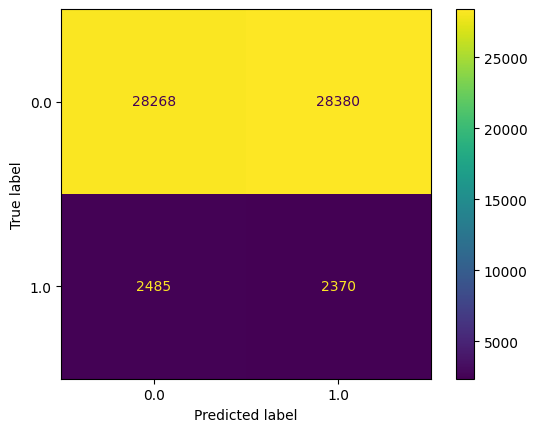

In [390]:
disp = ConfusionMatrixDisplay(matrix_confusion_dum, 
                              display_labels = model_dum.classes_)
disp.plot()

In [391]:
mlflow.set_experiment("DummyClassifier")

<Experiment: artifact_location='mlflow-artifacts:/101534954718809339', creation_time=1704227310004, experiment_id='101534954718809339', last_update_time=1704227310004, lifecycle_stage='active', name='DummyClassifier', tags={}>

In [392]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'strategy' : 'uniform'})
    mlflow.log_params({'random_state' : 0})

    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_dum)
    mlflow.log_metric('roc_auc', auc_dum)
    mlflow.log_metric('durée', TTot_dum)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "DummyClassifier_P7_AF_recall")

    # Infer the model signature
    signature = infer_signature(X_train, model_dum.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model = model_dum,
        artifact_path="model_dum",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_dum_recall")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'model_dum_recall'.
2024/01/03 22:00:29 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_dum_recall, version 1
Created version '1' of model 'model_dum_recall'.


In [393]:
# LogisticRegression
# Modèle
model_LR = make_pipeline(SMOTE(),LogisticRegression(random_state = 0, 
                                                    max_iter = 0, 
                                                    penalty = "l2"))
# Training
T0 = time.time()
model_LR.fit(X_train,y_train)
# Prédiction
y_pred_LR = model_LR.predict(X_test)
TTot_LR = time.time()-T0
# metriques
accuracy_LR = accuracy_score(y_test, y_pred_LR)
auc_LR = roc_auc_score(y_test, y_pred_LR)
matrix_confusion_LR = confusion_matrix(y_test, y_pred_LR, labels = model_LR.classes_)
f1_LR = f1_score(y_test, y_pred_LR)

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [394]:
accuracy_LR

0.5704599775620701

In [395]:
auc_LR

0.6741695768153444

In [396]:
f1_LR

0.22663934426229507

In [397]:
TTot_LR

1.0431039333343506

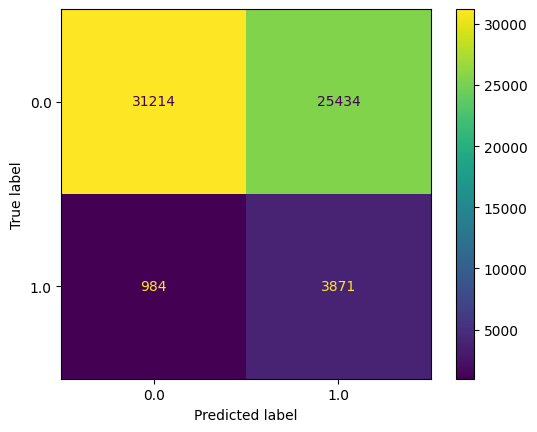

In [398]:
disp = ConfusionMatrixDisplay(matrix_confusion_LR, 
                              display_labels = model_LR.classes_)
disp.plot()

In [416]:
mlflow.set_experiment("LogisticRegression")

<Experiment: artifact_location='mlflow-artifacts:/888093429602863663', creation_time=1704227326702, experiment_id='888093429602863663', last_update_time=1704227326702, lifecycle_stage='active', name='LogisticRegression', tags={}>

In [417]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters

    mlflow.log_params({'max_iter' : 250})
    mlflow.log_params({'random_state' : 0})
    mlflow.log_params({'penalty' : None})

    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_LR)
    mlflow.log_metric('roc_auc', auc_LR)
    mlflow.log_metric('durée', TTot_LR)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "LogisticRegression_P7_AF_recall")

    # Infer the model signature
    signature = infer_signature(X_train, model_LR.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model = model_LR,
        artifact_path="model_LR",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_LR_recall")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'model_LR_recall' already exists. Creating a new version of this model...
2024/01/03 22:08:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_LR_recall, version 2
Created version '2' of model 'mod

In [400]:
# LGBMClassifier
# Modèle
model_LGMBC = make_pipeline(SMOTE(),LGBMClassifier(random_state = 0, 
                                                   learning_rate = 0.9, 
                                                   n_estimators = 150))
# Training
T0 = time.time()
model_LGMBC.fit(X_train,y_train)
# Prédiction
y_pred_LGMBC = model_LGMBC.predict(X_test)
TTot_LGMBC = time.time()-T0
# metriques
accuracy_LGMBC = accuracy_score(y_test, y_pred_LGMBC)
auc_LGMBC = roc_auc_score(y_test, y_pred_LGMBC)
matrix_confusion_LGMBC = confusion_matrix(y_test, y_pred_LGMBC, labels = model_LGMBC.classes_)
f1_LGMBC = f1_score(y_test, y_pred_LGMBC)

[LightGBM] [Info] Number of positive: 226038, number of negative: 226038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 452076, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [401]:
accuracy_LGMBC

0.9188657463863551

In [402]:
auc_LGMBC

0.6749821180568938

In [403]:
f1_LGMBC

0.42853870819972517

In [404]:
TTot_LGMBC

3.276629686355591

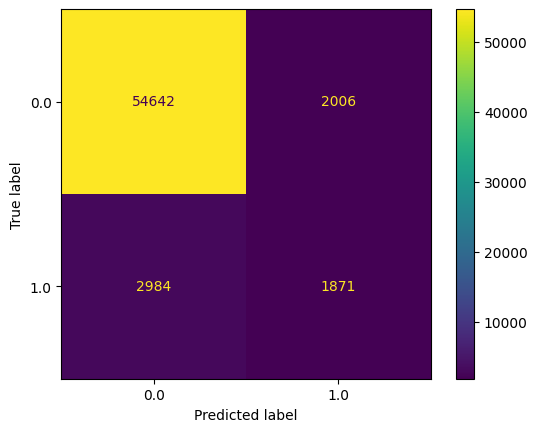

In [405]:
disp = ConfusionMatrixDisplay(matrix_confusion_LGMBC, 
                              display_labels = model_LGMBC.classes_)
disp.plot()

In [406]:
mlflow.set_experiment("LGMBC")

<Experiment: artifact_location='mlflow-artifacts:/706831843836183211', creation_time=1704227343121, experiment_id='706831843836183211', last_update_time=1704227343121, lifecycle_stage='active', name='LGMBC', tags={}>

In [407]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'n_estimators' : 100})
    mlflow.log_params({'random_state' : 0})
    mlflow.log_params({'learning_rate' : 0.9})

    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_LGMBC)
    mlflow.log_metric('roc_auc', auc_LGMBC)
    mlflow.log_metric('durée', auc_LGMBC)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "LGMBC_P7_AF_recall")

    # Infer the model signature
    signature = infer_signature(X_train, model_LGMBC.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model_LGMBC,
        artifact_path="model_LGMBC",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_LGMBC_recall")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'model_LGMBC_recall'.
2024/01/03 22:03:34 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_LGMBC_recall, version 1
Created version '1' of model 'model_LGMBC_recall'.


In [408]:
# DecisionTreeclassifier
# Modèle
model_Dtree = make_pipeline(SMOTE(),DecisionTreeClassifier(random_state = 0, 
                                                   min_samples_leaf = 3, 
                                                   min_samples_split = 4))
# Training
T0 = time.time()
model_Dtree.fit(X_train,y_train)
# Prédiction
y_pred_Dtree = model_Dtree.predict(X_test)
TTot_Dtree = time.time()-T0
# metriques
accuracy_Dtree = accuracy_score(y_test, y_pred_Dtree)
auc_Dtree = roc_auc_score(y_test, y_pred_Dtree)
matrix_confusion_Dtree = confusion_matrix(y_test, y_pred_Dtree, labels = model_Dtree.classes_)
f1_Dtree = f1_score(y_test, y_pred_Dtree)

In [409]:
accuracy_Dtree

0.862201843812497

In [410]:
auc_Dtree

0.677366366835664

In [411]:
f1_Dtree

0.34409101462735076

In [412]:
TTot_Dtree

36.76424837112427

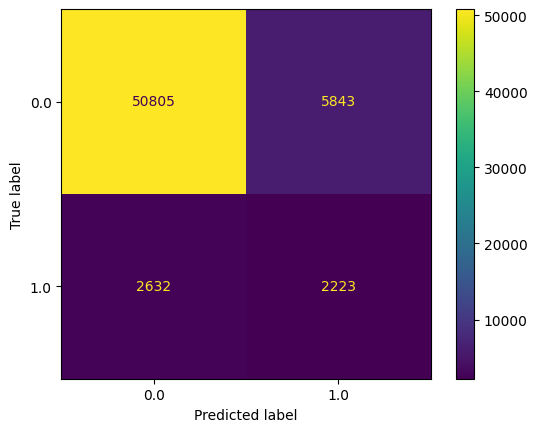

In [413]:
disp = ConfusionMatrixDisplay(matrix_confusion_Dtree, 
                              display_labels = model_Dtree.classes_)
disp.plot()

In [414]:
mlflow.set_experiment("Dtree")

<Experiment: artifact_location='mlflow-artifacts:/105389232120327589', creation_time=1704227596186, experiment_id='105389232120327589', last_update_time=1704227596186, lifecycle_stage='active', name='Dtree', tags={}>

In [415]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'min_samples_leaf' : 1})
    mlflow.log_params({'min_samples_split' : 2})


    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_Dtree)
    mlflow.log_metric('roc_auc', auc_Dtree)
    mlflow.log_metric('durée', auc_Dtree)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Dtree_P7_AF_recall")

    # Infer the model signature
    signature = infer_signature(X_train, model_Dtree.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model_Dtree,
        artifact_path="model_Dtree",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_Dtree_recall")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'model_Dtree_recall'.
2024/01/03 22:05:26 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_Dtree_recall, version 1
Created version '1' of model 'model_Dtree_recall'.


## III.3) spécificité

In [20]:
# Elaboration métrique score de spécificité
def specificity_score(y,y_pred) :
    cm = confusion_matrix(y,y_pred)
    FP = cm[0,1]
    TN = cm[0,0]
    specif = 1-(FP/(FP + TN))
    return specif

specif_score = make_scorer(specificity_score)


### III.3.1) Recherche meilleurs hypersparamètres specificité

In [448]:
# DummyClassifier

# Paramètres
parameters_dummy = {'dummyclassifier__strategy' : ["most_frequent", "prior", 
                                            "stratified", "uniform"]}
# fonction grid_search
grid_dum = optim_params_metier(DummyClassifier(random_state = 0), parameters_dummy, 
                              specif_score)

durée 7.5038063526153564 s


In [453]:
# LogisticRegression

# Paramètres
parameters_LR = {'logisticregression__penalty' : ["l2", None], 
                 'logisticregression__max_iter' : np.arange(0, 600,50)}

# fonction grid_search
grid_LR = optim_params_metier(LogisticRegression(random_state = 0), parameters_LR, 
                              specif_score)

durée 73.16580820083618 s


In [454]:
# LGBMClassifier
# Paramètres
parameters_LGMBC = {"lgbmclassifier__learning_rate" : [0.1,0.3,0.6,0.9],
 "lgbmclassifier__n_estimators" : [50,100,150]}
# fonction grid_search
grid_LGMBC = optim_params_metier(LGBMClassifier(random_state = 0), parameters_LGMBC,
                                 specif_score)

[LightGBM] [Info] Number of positive: 226038, number of negative: 226038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 452076, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
durée 99.72456288337708 s


In [455]:
grid_LGMBC.best_score_

0.9834585356725467

In [456]:
# DecisionTreeClassifier
# Paramètres
parameters_Dtree = {'decisiontreeclassifier__min_samples_split' : [2,3,4],
 'decisiontreeclassifier__min_samples_leaf' : [1,2,3]}
# fonction grid_search
grid_Dtree = optim_params_metier(DecisionTreeClassifier(random_state = 0), 
                          parameters_Dtree, specif_score)

durée 403.11768555641174 s


In [457]:
grid_Dtree.best_score_

0.9047328410585538

In [458]:
# best score
pd.DataFrame((grid_dum.best_score_,grid_LR.best_score_,grid_LGMBC.best_score_,grid_Dtree.best_score_),index = ["DUM","LR","LGMBC",'DTREE'], columns = ["specif"])

,specif
DUM,1.000000
LR,0.721065
LGMBC,0.983459
DTREE,0.904733


In [459]:
# best params
print(grid_dum.best_params_)
print(grid_LR.best_params_)
print(grid_LGMBC.best_params_)
print(grid_Dtree.best_params_)

{'dummyclassifier__strategy': 'most_frequent'}
{'logisticregression__max_iter': 150, 'logisticregression__penalty': 'l2'}
{'lgbmclassifier__learning_rate': 0.3, 'lgbmclassifier__n_estimators': 150}
{'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__min_samples_split': 4}


### III.3.2) Expérimentations meilleurs paramètres spécificité

In [460]:
# DummyClassifier
# Modèle
T0 = time.time()
model_dum = make_pipeline(SMOTE(), DummyClassifier(random_state = 0, 
                                                   strategy = 'most_frequent'))
# Training
model_dum.fit(X_train,y_train)
# Prédiction
y_pred_dum = model_dum.predict(X_test)
TTot_dum = time.time()-T0
# metriques
accuracy_dum = accuracy_score(y_test, y_pred_dum)
auc_dum = roc_auc_score(y_test, y_pred_dum)
matrix_confusion_dum = confusion_matrix(y_test, y_pred_dum, labels = model_dum.classes_)
f1_dum = f1_score(y_test,y_pred_dum)


In [461]:
accuracy_dum

0.9210607612636782

In [462]:
auc_dum

0.5

In [463]:
f1_dum

0.0

In [464]:
TTot_dum

0.6975393295288086

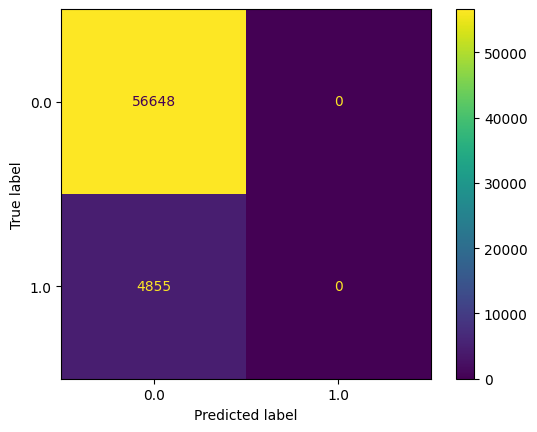

In [465]:
disp = ConfusionMatrixDisplay(matrix_confusion_dum, 
                              display_labels = model_dum.classes_)
disp.plot()

In [466]:
mlflow.set_experiment("DummyClassifier")

<Experiment: artifact_location='mlflow-artifacts:/101534954718809339', creation_time=1704227310004, experiment_id='101534954718809339', last_update_time=1704227310004, lifecycle_stage='active', name='DummyClassifier', tags={}>

In [467]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'strategy' : 'most_frequent'})
    mlflow.log_params({'random_state' : 0})

    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_dum)
    mlflow.log_metric('roc_auc', auc_dum)
    mlflow.log_metric('durée', TTot_dum)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "DummyClassifier_P7_AF_spécificité")

    # Infer the model signature
    signature = infer_signature(X_train, model_dum.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model = model_dum,
        artifact_path="model_dum",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_dum_spécificité")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'model_dum_spécificité'.
2024/01/04 14:14:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_dum_spécificité, version 1
Created version '1' of model 'model_dum_spécificité'.


In [468]:
# LogisticRegression
# Modèle
model_LR = make_pipeline(SMOTE(),LogisticRegression(random_state = 0, 
                                                    max_iter = 150, 
                                                    penalty = "l2"))
# Training
T0 = time.time()
model_LR.fit(X_train,y_train)
# Prédiction
y_pred_LR = model_LR.predict(X_test)
TTot_LR = time.time()-T0
# metriques
accuracy_LR = accuracy_score(y_test, y_pred_LR)
auc_LR = roc_auc_score(y_test, y_pred_LR)
matrix_confusion_LR = confusion_matrix(y_test, y_pred_LR, labels = model_LR.classes_)
f1_LR = f1_score(y_test, y_pred_LR)

In [469]:
accuracy_LR

0.7171357494756353

In [470]:
auc_LR

0.7119857468769138

In [471]:
f1_LR

0.282627520514618

In [472]:
TTot_LR

1.2505099773406982

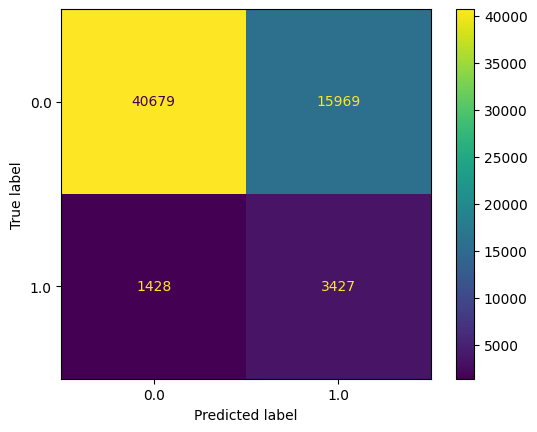

In [473]:
disp = ConfusionMatrixDisplay(matrix_confusion_LR, 
                              display_labels = model_LR.classes_)
disp.plot()

In [474]:
mlflow.set_experiment("LogisticRegression")

<Experiment: artifact_location='mlflow-artifacts:/888093429602863663', creation_time=1704227326702, experiment_id='888093429602863663', last_update_time=1704227326702, lifecycle_stage='active', name='LogisticRegression', tags={}>

In [475]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters

    mlflow.log_params({'max_iter' : 150})
    mlflow.log_params({'random_state' : 0})
    mlflow.log_params({'penalty' : "l2"})

    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_LR)
    mlflow.log_metric('roc_auc', auc_LR)
    mlflow.log_metric('durée', TTot_LR)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "LogisticRegression_P7_AF_spécificité")

    # Infer the model signature
    signature = infer_signature(X_train, model_LR.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model = model_LR,
        artifact_path="model_LR",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_LR_recall_spécificité")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'model_LR_recall_spécificité'.
2024/01/04 14:16:17 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_LR_recall_spécificité, version 1
Created version '1' of model 'model_LR_recall_spéci

In [476]:
# LGBMClassifier
# Modèle
model_LGMBC = make_pipeline(SMOTE(),LGBMClassifier(random_state = 0, 
                                                   learning_rate = 0.3, 
                                                   n_estimators = 150))
# Training
T0 = time.time()
model_LGMBC.fit(X_train,y_train)
# Prédiction
y_pred_LGMBC = model_LGMBC.predict(X_test)
TTot_LGMBC = time.time()-T0
# metriques
accuracy_LGMBC = accuracy_score(y_test, y_pred_LGMBC)
auc_LGMBC = roc_auc_score(y_test, y_pred_LGMBC)
matrix_confusion_LGMBC = confusion_matrix(y_test, y_pred_LGMBC, labels = model_LGMBC.classes_)
f1_LGMBC = f1_score(y_test, y_pred_LGMBC)

[LightGBM] [Info] Number of positive: 226038, number of negative: 226038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 452076, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [477]:
accuracy_LGMBC

0.932946360340146

In [478]:
auc_LGMBC

0.6595565696251888

In [479]:
f1_LGMBC

0.44088937093275493

In [480]:
TTot_LGMBC

3.0016982555389404

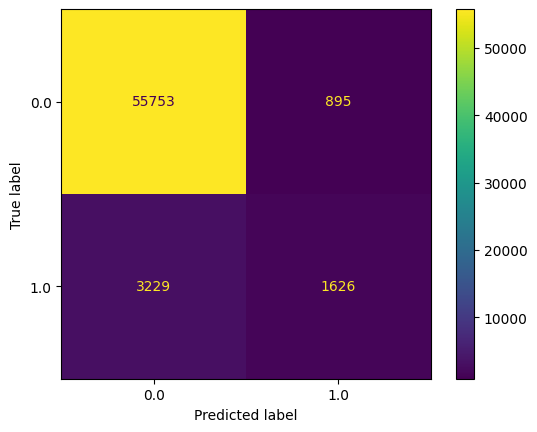

In [481]:
disp = ConfusionMatrixDisplay(matrix_confusion_LGMBC, 
                              display_labels = model_LGMBC.classes_)
disp.plot()

In [482]:
mlflow.set_experiment("LGMBC")

<Experiment: artifact_location='mlflow-artifacts:/706831843836183211', creation_time=1704227343121, experiment_id='706831843836183211', last_update_time=1704227343121, lifecycle_stage='active', name='LGMBC', tags={}>

In [483]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'n_estimators' : 150})
    mlflow.log_params({'random_state' : 0})
    mlflow.log_params({'learning_rate' : 0.3})

    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_LGMBC)
    mlflow.log_metric('roc_auc', auc_LGMBC)
    mlflow.log_metric('durée', auc_LGMBC)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "LGMBC_P7_AF_spécificité")

    # Infer the model signature
    signature = infer_signature(X_train, model_LGMBC.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model_LGMBC,
        artifact_path="model_LGMBC",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_LGMBC_spécificité")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'model_LGMBC_spécificité'.
2024/01/04 14:17:33 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_LGMBC_spécificité, version 1
Created version '1' of model 'model_LGMBC_spécificité'.


In [484]:
# DecisionTreeclassifier
# Modèle
model_Dtree = make_pipeline(SMOTE(),DecisionTreeClassifier(random_state = 0, 
                                                   min_samples_leaf = 2, 
                                                   min_samples_split = 4))
# Training
T0 = time.time()
model_Dtree.fit(X_train,y_train)
# Prédiction
y_pred_Dtree = model_Dtree.predict(X_test)
TTot_Dtree = time.time()-T0
# metriques
accuracy_Dtree = accuracy_score(y_test, y_pred_Dtree)
auc_Dtree = roc_auc_score(y_test, y_pred_Dtree)
matrix_confusion_Dtree = confusion_matrix(y_test, y_pred_Dtree, labels = model_Dtree.classes_)
f1_Dtree = f1_score(y_test, y_pred_Dtree)

In [485]:
accuracy_Dtree

0.863274962196966

In [486]:
auc_Dtree

0.6746533055560848

In [487]:
f1_Dtree

0.3422761048103246

In [488]:
TTot_Dtree

26.585833072662354

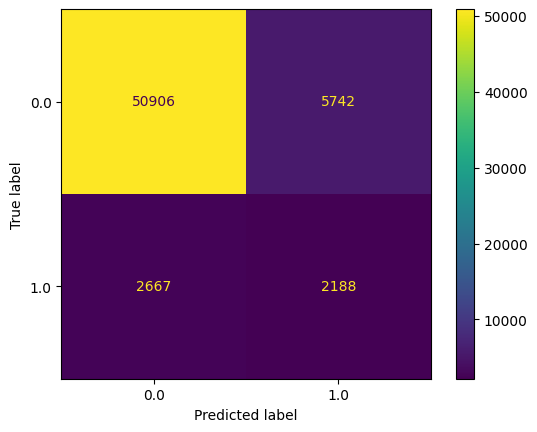

In [489]:
disp = ConfusionMatrixDisplay(matrix_confusion_Dtree, 
                              display_labels = model_Dtree.classes_)
disp.plot()

In [490]:
mlflow.set_experiment("Dtree")

<Experiment: artifact_location='mlflow-artifacts:/105389232120327589', creation_time=1704227596186, experiment_id='105389232120327589', last_update_time=1704227596186, lifecycle_stage='active', name='Dtree', tags={}>

In [491]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'min_samples_leaf' : 2})
    mlflow.log_params({'min_samples_split' : 4})


    # Log the loss metric
    mlflow.log_metric('accuracy', accuracy_Dtree)
    mlflow.log_metric('roc_auc', auc_Dtree)
    mlflow.log_metric('durée', auc_Dtree)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Dtree_P7_AF_spécificité")

    # Infer the model signature
    signature = infer_signature(X_train, model_Dtree.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model_Dtree,
        artifact_path="model_Dtree",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_Dtree_spécificité")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'model_Dtree_spécificité'.
2024/01/04 14:26:15 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_Dtree_spécificité, version 1
Created version '1' of model 'model_Dtree_spécificité'.


## III.4)  Fonction de cout

In [20]:
# Fonction d'optimisation des paramètres métier II (prise en compte autres métriques)
def optim_params_metierII(algo, parameters, score, refit) : 
    # T0
    T0 = time.time()
    # Application SMOTE
    pipeline = make_pipeline(SMOTE(), algo)  
    # REcherche des meilleurs paramètres
    grid = GridSearchCV(pipeline, 
                        parameters, 
                        cv = 4,
                        scoring = score, 
                        n_jobs = 2,
                        refit = refit)
    # training
    grid.fit(X_train,y_train)                                  
    TTot = time.time() - T0
    print (f"durée {TTot} s")
    return grid

In [21]:
# FONCTION DE COUT SANS OPTIMISATION DE SEUIL

In [22]:
# Elaboration fonction de côut
def my_cost_loss_I(y,y_pred) :
    # définition des des variables
    cm = confusion_matrix(y,y_pred)
    FP = np.abs(cm[0,1])
    FN = np.abs(cm[1,0])
    TP = np.abs(cm[1,1])
    TN = np.abs(cm[0,0])
    # fonction de cout
    cost = ((2*FP) + (20*FN) + TP + TN)/1000
    return cost

# Elaboration score fonction de coût
cost_loss = make_scorer(my_cost_loss_I, greater_is_better = False, 
                         needs_proba = False, 
                         needs_threshold = False)

In [23]:
# UTILISATION NOUVEL ESTIMATEUR AVEC COUT + SEUIL
# ne marche pas avec pipeline

In [24]:
# Elaboration fonction de côut
def my_cost_loss_II(estimator, X , y):
    y_pred = estimator.predict_proba(X)
    # Prédictions 1
    y_pred_one = y_pred[:,1]
    # Mise en place du seuil
    seuils_list = np.arange(0,1,0.01)
    # Prédiction set de train
    cost_list = []
    for seuil in seuils_list :
        y_pred_temp = (y_pred_one > seuil).astype(int)  
        # définition des des variables
        cm = confusion_matrix(y,y_pred_temp)
        FP = np.abs(cm[0,1])
        FN = np.abs(cm[1,0])
        TP = np.abs(cm[1,1])
        TN = np.abs(cm[0,0])
        # fonction de cout
        cost = ((-2*FP) + (-20*FN) + TP + TN)/1000
        cost_list.append(cost)
    best_cost = min(cost_list)
    return best_cost

In [25]:
# UTILISATION NOUVEL ESTIMATEUR AVEC COUT + SEUIL MAKE SCORER
# pas réussi à récupérer la proba

In [26]:
# Elaboration fonction de côut
def my_cost_loss_III(y, y_pred):
    # Prédictions 1
    y_pred_proba = y_pred[:,1]
    # Mise en place du seuil
    seuils_list = np.arange(0,1,0.01)
    # Prédiction set de train
    cost_list = []
    for seuil in seuils_list :
        y_pred_temp = (y_pred_proba > seuil).astype(int)  
        # définition des des variables
        cm = confusion_matrix(y,y_pred_temp)
        FP = np.abs(cm[0,1])
        FN = np.abs(cm[1,0])
        TP = np.abs(cm[1,1])
        TN = np.abs(cm[0,0])
        # fonction de cout
        cost = ((2*FP) + (20*FN) + TP + TN)/1000
        cost_list.append(cost)
    best_cost = min(cost_list)
    return best_cost
    
    
# Elaboration score fonction de coût
cost_loss_temp = make_scorer(my_cost_loss_III, 
                             greater_is_better = False, 
                             needs_proba = True)

### III.4.1) Recherche meilleurs hypersparamètres fonction de coût

In [945]:
# DummyClassifier

# Paramètres
parameters_dummy = {'dummyclassifier__strategy' : ["most_frequent", "prior", 
                                            "stratified", "uniform"]}
score = {"AUC" : "roc_auc", "cost" : cost_loss}

# fonction grid_search
grid_dum = optim_params_metierII(DummyClassifier(random_state = 0), 
                               parameters_dummy, 
                               score,
                               "cost")

durée 7.810809135437012 s


In [946]:
# LogisticRegression

# Paramètres
parameters_LR = {'logisticregression__penalty' : ["l2", None], 
                 'logisticregression__max_iter' : np.arange(0, 600,50)}

score = {"AUC" : "roc_auc", "cost" : cost_loss}

# fonction grid_search
grid_LR = optim_params_metierII(LogisticRegression(random_state = 0), 
                                parameters_LR, 
                                score,
                                "cost")

durée 79.26378440856934 s


In [947]:
# LGBMClassifier
# Paramètres
parameters_LGMBC = {"lgbmclassifier__learning_rate" : [0.1,0.3,0.6,0.9],
 "lgbmclassifier__n_estimators" : [50,100,150]}

score = {"AUC" : "roc_auc", "cost" : cost_loss}

# fonction grid_search
grid_LGMBC = optim_params_metierII(LGBMClassifier(random_state = 0), 
                                 parameters_LGMBC,
                                 score,
                                 "cost")

[LightGBM] [Info] Number of positive: 226038, number of negative: 226038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 452076, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
durée 103.62232279777527 s


In [948]:
# DecisionTreeClassifier
# Paramètres
parameters_Dtree = {'decisiontreeclassifier__min_samples_split' : [2,3,4],
 'decisiontreeclassifier__min_samples_leaf' : [1,2,3]}

score = {"AUC" : "roc_auc", "cost" : cost_loss}

# fonction grid_search
grid_Dtree = optim_params_metierII(DecisionTreeClassifier(random_state = 0), 
                                   parameters_Dtree, 
                                   score,
                                   "cost")

durée 406.3366949558258 s


In [949]:
# best score
pd.DataFrame((grid_dum.best_score_,grid_LR.best_score_,grid_LGMBC.best_score_,grid_Dtree.best_score_),index = ["DUM","LR","LGMBC",'DTREE'], columns = ["cost_score"])

,cost_score
DUM,-136.60850
LR,-104.86275
LGMBC,-122.72600
DTREE,-119.50225


In [950]:
# best params
print(grid_dum.best_params_)
print(grid_LR.best_params_)
print(grid_LGMBC.best_params_)
print(grid_Dtree.best_params_)

{'dummyclassifier__strategy': 'uniform'}
{'logisticregression__max_iter': 100, 'logisticregression__penalty': None}
{'lgbmclassifier__learning_rate': 0.9, 'lgbmclassifier__n_estimators': 150}
{'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}


### III.4.2) Mise au point des seuils approche cost_loss set de TRAIN

#### DUMMYCLASSIFIER

In [961]:
# Dummyclassifier
# Modèle
model_dum = make_pipeline(SMOTE(),DummyClassifier(random_state = 0, 
                                                    strategy = "uniform"))
# Training
T0 = time.time()
model_dum.fit(X_train,y_train)
# Prédiction
y_pred_dum_proba = model_dum.predict_proba(X_train)
TTot_dum = time.time()-T0

In [962]:
# Mise en place du seuil
seuils_list = np.arange(0,1,0.01)
# Prédiction set de train
y_pred_dum_proba_one = y_pred_dum_proba[:,1]
# Mise en place de dictionnaires seuil et valeurs métriques
cost_dico = {}
auc_dico = {}
for seuil in seuils_list :
        y_pred_temp = (y_pred_dum_proba_one> seuil).astype(int)  
        # définition des des variables
        cm = confusion_matrix(y_train,y_pred_temp)
        FP = np.abs(cm[0,1])
        FN = np.abs(cm[1,0])
        TP = np.abs(cm[1,1])
        TN = np.abs(cm[0,0])
        cost = ((2*FP) + (20*FN) + TP + TN)/1000
        roc_auc = roc_auc_score(y_train, y_pred_temp)
        cost_dico[seuil] = cost
        auc_dico[seuil] = roc_auc

In [963]:
# Seuil et valeurs
min_cost_loss_dum = min(cost_dico.values())
for key,value in cost_dico.items():
    if value == min_cost_loss_dum :
        seuil_cost_loss_dum = key
        
max_auc_score_dum = max(auc_dico.values())
for key,value in auc_dico.items():
    if value == max_auc_score_dum :
        seuil_max_auc_score_dum = key
        
print(f"valeur min cost_loss : {min_cost_loss_dum}, seuil : {seuil_cost_loss_dum}")
print(f"valeur max_auc_score_dum : {max_auc_score_dum}, seuil : {seuil_max_auc_score_dum}")

valeur min cost_loss : 472.046, seuil : 0.49
valeur max_auc_score_dum : 0.5, seuil : 0.99


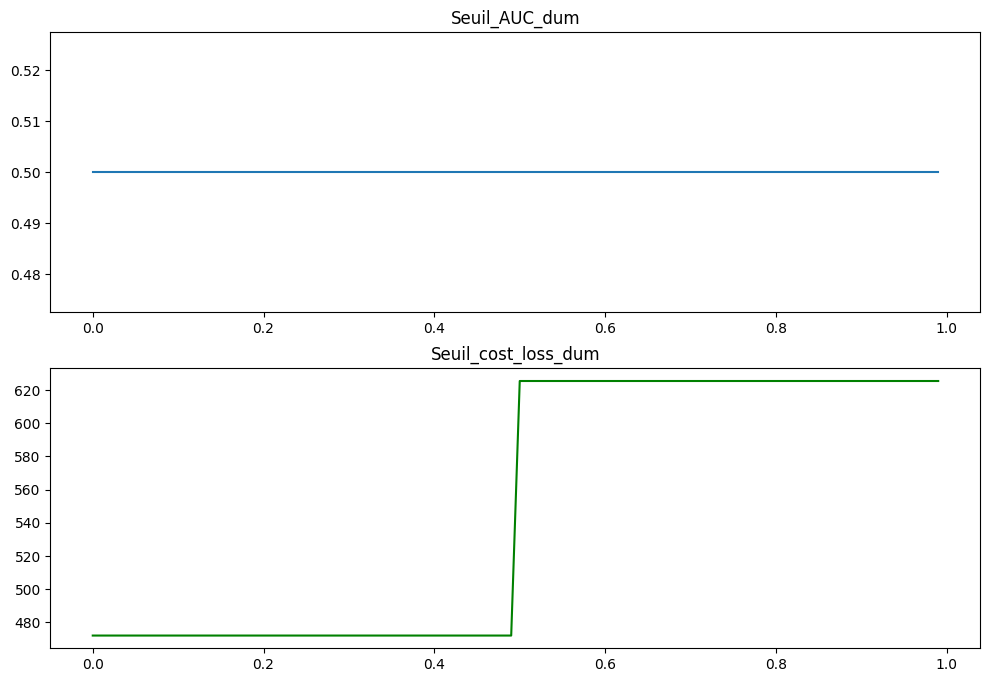

In [964]:
# garhipques
plt.rcParams["figure.figsize"] = (12,8)
# Courbe seuil et AUC
plt.subplot(211)
plt.plot(pd.DataFrame.from_dict(auc_dico, orient = "index"))
plt.title("Seuil_AUC_dum")
# Courbe seuil et cost_loss
plt.subplot(212)
plt.plot(pd.DataFrame.from_dict(cost_dico, orient = "index"), color = "green")
plt.title("Seuil_cost_loss_dum")
plt.show()

In [965]:
# Comparatif des AUC & loss_score en fonction des seuils

# Seuil Normal 
seuil_normal = 0.5
y_pred_temp_normal = (y_pred_dum_proba_one > seuil_normal).astype(int)  
# définition des des variables
cm_normal = confusion_matrix(y_train,y_pred_temp_normal)
FP_normal = np.abs(cm_normal[0,1])
FN_normal = np.abs(cm_normal[1,0])
TP_normal = np.abs(cm_normal[1,1])
TN_normal = np.abs(cm_normal[0,0])
cost_normal = ((2*FP_normal) + (20*FN_normal) + TP_normal + TN_normal)/1000
roc_auc_normal = roc_auc_score(y_train, y_pred_temp_normal)

# Seuil best AUC 
y_pred_temp_best_auc = (y_pred_dum_proba_one > seuil_max_auc_score_dum).astype(int)  
# définition des des variables
cm_best_auc = confusion_matrix(y_train,y_pred_temp_best_auc)
FP_best_auc = np.abs(cm_best_auc[0,1])
FN_best_auc = np.abs(cm_best_auc[1,0])
TP_best_auc = np.abs(cm_best_auc[1,1])
TN_best_auc = np.abs(cm_best_auc[0,0])
cost_best_auc = ((2*FP_best_auc) + (20*FN_best_auc) + TP_best_auc + TN_best_auc)/1000
roc_auc_best_auc = roc_auc_score(y_train, y_pred_temp_best_auc)

# Seuil best loss_score
y_pred_temp_best_loss = (y_pred_dum_proba_one > seuil_cost_loss_dum).astype(int)  
# définition des des variables
cm_best_loss = confusion_matrix(y_train,y_pred_temp_best_loss)
FP_best_loss = np.abs(cm_best_loss[0,1])
FN_best_loss = np.abs(cm_best_loss[1,0])
TP_best_loss = np.abs(cm_best_loss[1,1])
TN_best_loss = np.abs(cm_best_loss[0,0])
cost_best_loss = ((2*FP_best_loss) + (20*FN_best_loss) + TP_best_loss + TN_best_loss)/1000
roc_auc_best_loss = roc_auc_score(y_train, y_pred_temp_best_loss)

In [966]:
# Dataframe avec seuils
df_dum_loss_auc = pd.DataFrame(([seuil_normal, seuil_max_auc_score_dum, seuil_cost_loss_dum],
              [FP_normal, FP_best_auc, FP_best_loss],
              [FN_normal, FN_best_auc, FN_best_loss],
              [TP_normal, TP_best_auc, TP_best_loss],
              [TN_normal, TN_best_auc, TN_best_loss],
              [roc_auc_normal, roc_auc_best_auc, roc_auc_best_loss],
              [cost_normal, cost_best_auc,cost_best_loss]),
              columns = ["seuil_normal","seuil_best_auc","seuil_best_loss"],
              index= ["seuils","FP", "FN", "TP", "TN", "roc_auc", "cost_loss"])

In [967]:
df_dum_loss_auc

,seuil_normal,seuil_best_auc,seuil_best_loss
seuils,0.500,0.990,0.490
FP,0.000,0.000,226038.000
FN,19970.000,19970.000,0.000
TP,0.000,0.000,19970.000
TN,226038.000,226038.000,0.000
roc_auc,0.500,0.500,0.500
cost_loss,625.438,625.438,472.046


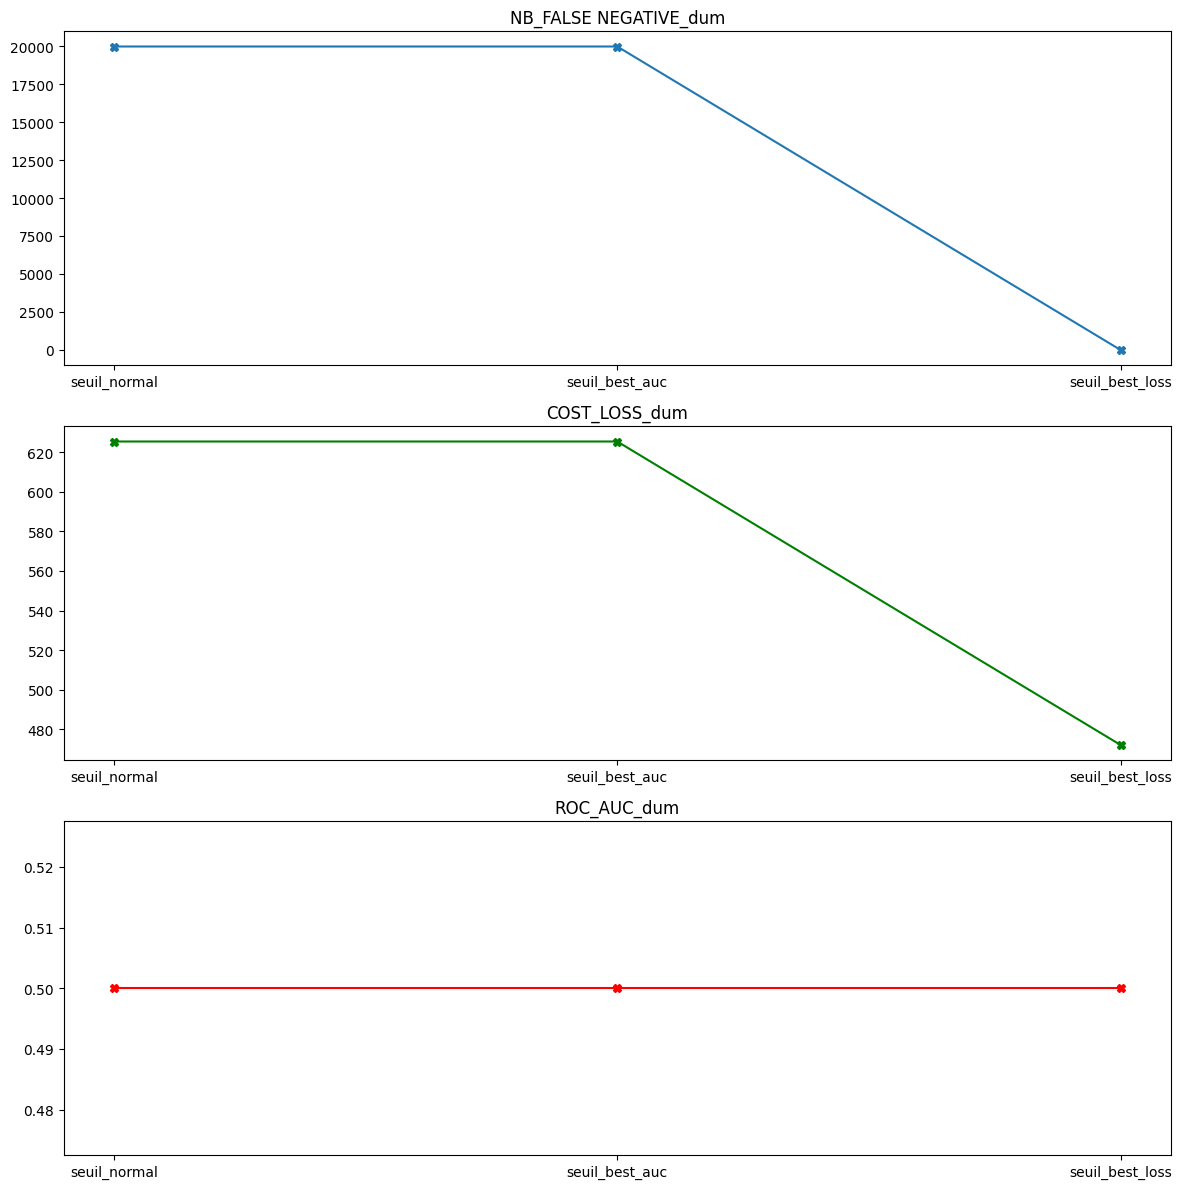

In [968]:
# grahipques
plt.rcParams["figure.figsize"] = (12,12)
# Courbe seuil et AUC
plt.subplot(311)
plt.plot(df_dum_loss_auc.loc["FN"], marker = "X")
plt.title("NB_FALSE NEGATIVE_dum")
# Courbe seuil et cost_loss
plt.subplot(312)
plt.plot(df_dum_loss_auc.loc["cost_loss"], color = "green", marker = "X")
plt.title("COST_LOSS_dum")
# Courbe seuil et roc_auc
plt.subplot(313)
plt.plot(df_dum_loss_auc.loc["roc_auc"], color = "red", marker = "X")
plt.title("ROC_AUC_dum")
plt.tight_layout()
plt.show()

#### LOGISTIC REGRESSION

In [951]:
# LogisticRegression
# Modèle
model_LR = make_pipeline(SMOTE(),LogisticRegression(random_state = 0, 
                                                    max_iter = 100, 
                                                    penalty = None))
# Training
T0 = time.time()
model_LR.fit(X_train,y_train)
# Prédiction
y_pred_LR_proba = model_LR.predict_proba(X_train)
TTot_LR = time.time()-T0

In [952]:
# Mise en place du seuil
seuils_list = np.arange(0,1,0.01)
# Prédiction set de train
y_pred_LR_proba_one = y_pred_LR_proba[:,1]
# Mise en place de dictionnaires seuil et valeurs métriques
cost_dico = {}
auc_dico = {}
for seuil in seuils_list :
        y_pred_temp = (y_pred_LR_proba_one> seuil).astype(int)  
        # définition des des variables
        cm = confusion_matrix(y_train,y_pred_temp)
        FP = np.abs(cm[0,1])
        FN = np.abs(cm[1,0])
        TP = np.abs(cm[1,1])
        TN = np.abs(cm[0,0])
        cost = ((2*FP) + (20*FN) + TP + TN)/1000
        roc_auc = roc_auc_score(y_train, y_pred_temp)
        cost_dico[seuil] = cost
        auc_dico[seuil] = roc_auc

In [953]:
# Seuil et valeurs
min_cost_loss_LR = min(cost_dico.values())
for key,value in cost_dico.items():
    if value == min_cost_loss_LR :
        seuil_cost_loss_LR = key
        
max_auc_score_LR = max(auc_dico.values())
for key,value in auc_dico.items():
    if value == max_auc_score_LR :
        seuil_max_auc_score_LR = key
        
print(f"valeur min cost_loss : {min_cost_loss_LR}, seuil : {seuil_cost_loss_LR}")
print(f"valeur max_auc_score_LR : {max_auc_score_LR}, seuil : {seuil_max_auc_score_LR}")

valeur min cost_loss : 407.675, seuil : 0.37
valeur max_auc_score_LR : 0.7161294330917625, seuil : 0.48


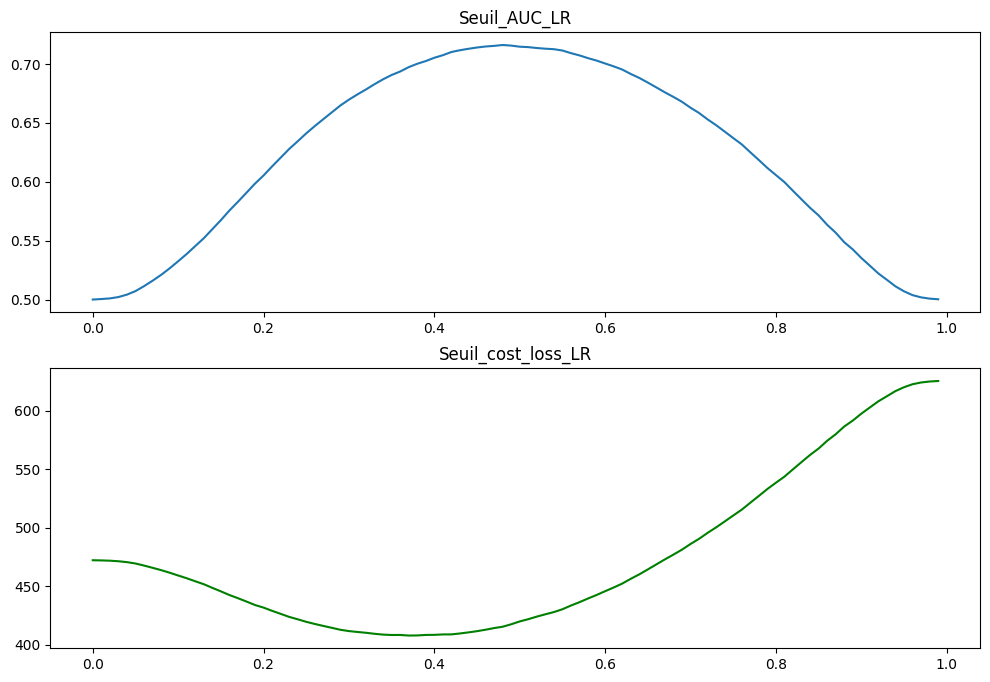

In [954]:
# garhipques
plt.rcParams["figure.figsize"] = (12,8)
# Courbe seuil et AUC
plt.subplot(211)
plt.plot(pd.DataFrame.from_dict(auc_dico, orient = "index"))
plt.title("Seuil_AUC_LR")
# Courbe seuil et cost_loss
plt.subplot(212)
plt.plot(pd.DataFrame.from_dict(cost_dico, orient = "index"), color = "green")
plt.title("Seuil_cost_loss_LR")
plt.show()

In [955]:
# Comparatif des AUC & loss_score en fonction des seuils

# Seuil Normal 
seuil_normal = 0.5
y_pred_temp_normal = (y_pred_LR_proba_one > seuil_normal).astype(int)  
# définition des des variables
cm_normal = confusion_matrix(y_train,y_pred_temp_normal)
FP_normal = np.abs(cm_normal[0,1])
FN_normal = np.abs(cm_normal[1,0])
TP_normal = np.abs(cm_normal[1,1])
TN_normal = np.abs(cm_normal[0,0])
cost_normal = ((2*FP_normal) + (20*FN_normal) + TP_normal + TN_normal)/1000
roc_auc_normal = roc_auc_score(y_train, y_pred_temp_normal)

# Seuil best AUC 
y_pred_temp_best_auc = (y_pred_LR_proba_one > seuil_max_auc_score_LR).astype(int)  
# définition des des variables
cm_best_auc = confusion_matrix(y_train,y_pred_temp_best_auc)
FP_best_auc = np.abs(cm_best_auc[0,1])
FN_best_auc = np.abs(cm_best_auc[1,0])
TP_best_auc = np.abs(cm_best_auc[1,1])
TN_best_auc = np.abs(cm_best_auc[0,0])
cost_best_auc = ((2*FP_best_auc) + (20*FN_best_auc) + TP_best_auc + TN_best_auc)/1000
roc_auc_best_auc = roc_auc_score(y_train, y_pred_temp_best_auc)

# Seuil best loss_score
y_pred_temp_best_loss = (y_pred_LR_proba_one > seuil_cost_loss_LR).astype(int)  
# définition des des variables
cm_best_loss = confusion_matrix(y_train,y_pred_temp_best_loss)
FP_best_loss = np.abs(cm_best_loss[0,1])
FN_best_loss = np.abs(cm_best_loss[1,0])
TP_best_loss = np.abs(cm_best_loss[1,1])
TN_best_loss = np.abs(cm_best_loss[0,0])
cost_best_loss = ((2*FP_best_loss) + (20*FN_best_loss) + TP_best_loss + TN_best_loss)/1000
roc_auc_best_loss = roc_auc_score(y_train, y_pred_temp_best_loss)

In [956]:
# Dataframe avec seuils
df_LR_loss_auc = pd.DataFrame(([seuil_normal, seuil_max_auc_score_LR, seuil_cost_loss_LR],
              [FP_normal, FP_best_auc, FP_best_loss],
              [FN_normal, FN_best_auc, FN_best_loss],
              [TP_normal, TP_best_auc, TP_best_loss],
              [TN_normal, TN_best_auc, TN_best_loss],
              [roc_auc_normal, roc_auc_best_auc, roc_auc_best_loss],
              [cost_normal, cost_best_auc,cost_best_loss]),
              columns = ["seuil_normal","seuil_best_auc","seuil_best_loss"],
              index= ["seuils","FP", "FN", "TP", "TN", "roc_auc", "cost_loss"])

In [957]:
df_LR_loss_auc

,seuil_normal,seuil_best_auc,seuil_best_loss
seuils,0.500000,0.480000,0.370000
FP,63053.000000,68092.000000,100221.000000
FN,5825.000000,5322.000000,3234.000000
TP,14145.000000,14648.000000,16736.000000
TN,162985.000000,157946.000000,125817.000000
roc_auc,0.714682,0.716129,0.697338
cost_loss,419.736000,415.218000,407.675000


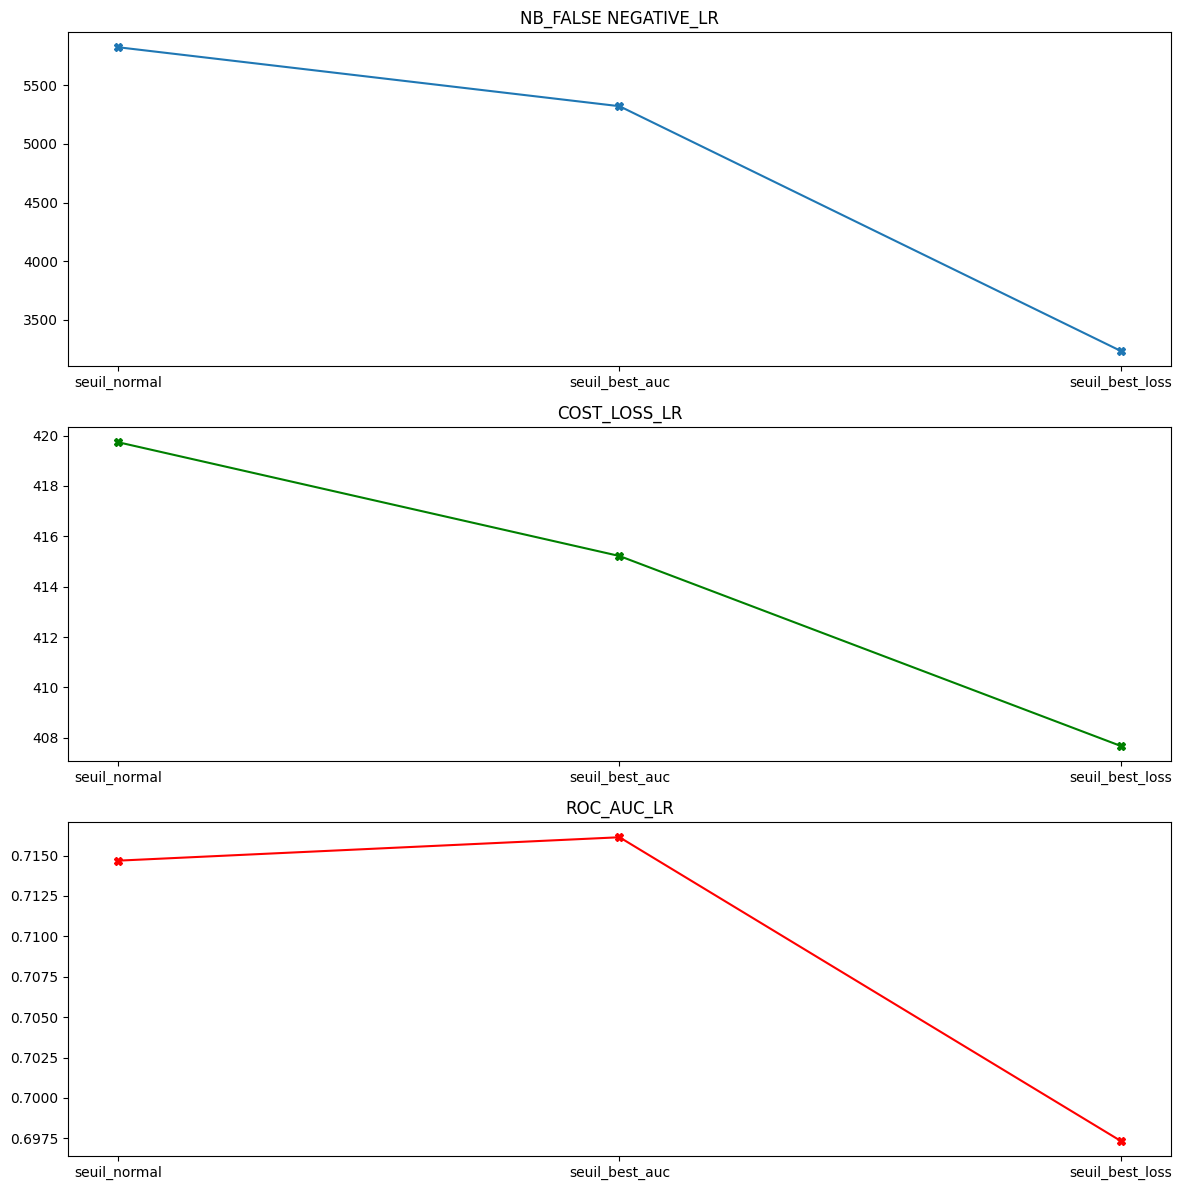

In [958]:
# grahipques
plt.rcParams["figure.figsize"] = (12,12)
# Courbe seuil et AUC
plt.subplot(311)
plt.plot(df_LR_loss_auc.loc["FN"], marker = "X")
plt.title("NB_FALSE NEGATIVE_LR")
# Courbe seuil et cost_loss
plt.subplot(312)
plt.plot(df_LR_loss_auc.loc["cost_loss"], color = "green", marker = "X")
plt.title("COST_LOSS_LR")
# Courbe seuil et roc_auc
plt.subplot(313)
plt.plot(df_LR_loss_auc.loc["roc_auc"], color = "red", marker = "X")
plt.title("ROC_AUC_LR")
plt.tight_layout()
plt.show()

#### LGBMC CLASSIFIER

In [28]:
# LGBMCClassifier
# Modèle
model_LGMBC = make_pipeline(SMOTE(),LGBMClassifier(random_state = 0, 
                                                   learning_rate = 0.9, 
                                                   n_estimators = 150))
# Training
T0 = time.time()
model_LGMBC.fit(X_train,y_train)
# Prédiction
y_pred_LGBMC_proba = model_LGMBC.predict_proba(X_train)
TTot_LGMBC = time.time()-T0

[LightGBM] [Info] Number of positive: 226038, number of negative: 226038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 452076, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [29]:
# Mise en place du seuil
seuils_list = np.arange(0,1,0.01)
# Prédiction set de train
y_pred_LGBMC_proba_one = y_pred_LGBMC_proba[:,1]
# Mise en place de dictionnaires seuil et valeurs métriques
cost_dico = {}
auc_dico = {}
for seuil in seuils_list :
        y_pred_temp = (y_pred_LGBMC_proba_one> seuil).astype(int)  
        # définition des des variables
        cm = confusion_matrix(y_train,y_pred_temp)
        FP = np.abs(cm[0,1])
        FN = np.abs(cm[1,0])
        TP = np.abs(cm[1,1])
        TN = np.abs(cm[0,0])
        cost = ((2*FP) + (20*FN) + TP + TN)/1000
        roc_auc = roc_auc_score(y_train, y_pred_temp)
        cost_dico[seuil] = cost
        auc_dico[seuil] = roc_auc

In [30]:
# Seuil et valeurs
min_cost_loss_LGBMC = min(cost_dico.values())
for key,value in cost_dico.items():
    if value == min_cost_loss_LGBMC :
        seuil_cost_loss_LGBMC = key
        
max_auc_score_LGBMC = max(auc_dico.values())
for key,value in auc_dico.items():
    if value == max_auc_score_LGBMC :
        seuil_max_auc_score_LGBMC = key
        
print(f"valeur min cost_loss : {min_cost_loss_LGBMC}, seuil : {seuil_cost_loss_LGBMC}")
print(f"valeur max_auc_score_LGBMC : {max_auc_score_LGBMC}, seuil : {seuil_max_auc_score_LGBMC}")

valeur min cost_loss : 337.517, seuil : 0.06
valeur max_auc_score_LGBMC : 0.8408763075155385, seuil : 0.11


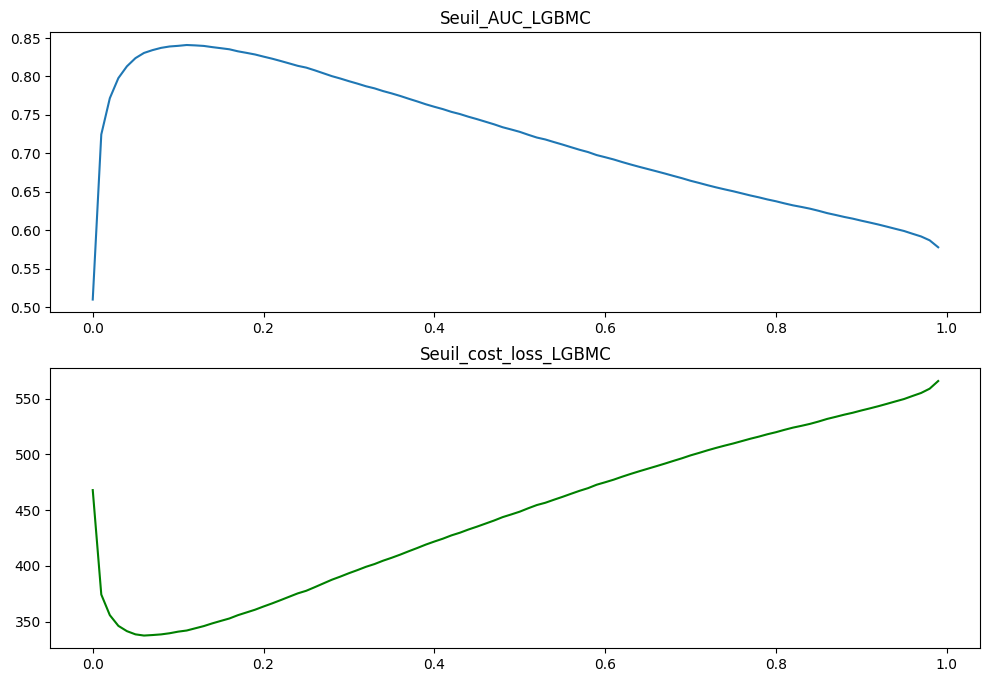

In [31]:
# garhipques
plt.rcParams["figure.figsize"] = (12,8)
# Courbe seuil et AUC
plt.subplot(211)
plt.plot(pd.DataFrame.from_dict(auc_dico, orient = "index"))
plt.title("Seuil_AUC_LGBMC")
# Courbe seuil et cost_loss
plt.subplot(212)
plt.plot(pd.DataFrame.from_dict(cost_dico, orient = "index"), color = "green")
plt.title("Seuil_cost_loss_LGBMC")
plt.show()

In [32]:
# Comparatif des AUC & loss_score en fonction des seuils

# Seuil Normal 
seuil_normal = 0.5
y_pred_temp_normal = (y_pred_LGBMC_proba_one > seuil_normal).astype(int)  
# définition des des variables
cm_normal = confusion_matrix(y_train,y_pred_temp_normal)
FP_normal = np.abs(cm_normal[0,1])
FN_normal = np.abs(cm_normal[1,0])
TP_normal = np.abs(cm_normal[1,1])
TN_normal = np.abs(cm_normal[0,0])
cost_normal = ((2*FP_normal) + (20*FN_normal) + TP_normal + TN_normal)/1000
roc_auc_normal = roc_auc_score(y_train, y_pred_temp_normal)

# Seuil best AUC 
y_pred_temp_best_auc = (y_pred_LGBMC_proba_one > seuil_max_auc_score_LGBMC).astype(int)  
# définition des des variables
cm_best_auc = confusion_matrix(y_train,y_pred_temp_best_auc)
FP_best_auc = np.abs(cm_best_auc[0,1])
FN_best_auc = np.abs(cm_best_auc[1,0])
TP_best_auc = np.abs(cm_best_auc[1,1])
TN_best_auc = np.abs(cm_best_auc[0,0])
cost_best_auc = ((2*FP_best_auc) + (20*FN_best_auc) + TP_best_auc + TN_best_auc)/1000
roc_auc_best_auc = roc_auc_score(y_train, y_pred_temp_best_auc)

# Seuil best loss_score
y_pred_temp_best_loss = (y_pred_LGBMC_proba_one > seuil_cost_loss_LGBMC).astype(int)  
# définition des des variables
cm_best_loss = confusion_matrix(y_train,y_pred_temp_best_loss)
FP_best_loss = np.abs(cm_best_loss[0,1])
FN_best_loss = np.abs(cm_best_loss[1,0])
TP_best_loss = np.abs(cm_best_loss[1,1])
TN_best_loss = np.abs(cm_best_loss[0,0])
cost_best_loss = ((2*FP_best_loss) + (20*FN_best_loss) + TP_best_loss + TN_best_loss)/1000
roc_auc_best_loss = roc_auc_score(y_train, y_pred_temp_best_loss)

In [33]:
# Dataframe avec seuils
df_LGBMC_loss_auc = pd.DataFrame(([seuil_normal, seuil_max_auc_score_LGBMC, seuil_cost_loss_LGBMC],
              [FP_normal, FP_best_auc, FP_best_loss],
              [FN_normal, FN_best_auc, FN_best_loss],
              [TP_normal, TP_best_auc, TP_best_loss],
              [TN_normal, TN_best_auc, TN_best_loss],
              [roc_auc_normal, roc_auc_best_auc, roc_auc_best_loss],
              [cost_normal, cost_best_auc,cost_best_loss]),
              columns = ["seuil_normal","seuil_best_auc","seuil_best_loss"],
              index= ["seuils","FP", "FN", "TP", "TN", "roc_auc", "cost_loss"])

In [34]:
df_LGBMC_loss_auc

,seuil_normal,seuil_best_auc,seuil_best_loss
seuils,0.500000,0.110000,0.06000
FP,5516.000000,36440.000000,54630.00000
FN,10376.000000,3136.000000,1941.00000
TP,9594.000000,16834.000000,18029.00000
TN,220522.000000,189598.000000,171408.00000
roc_auc,0.728009,0.840876,0.83056
cost_loss,448.668000,342.032000,337.51700


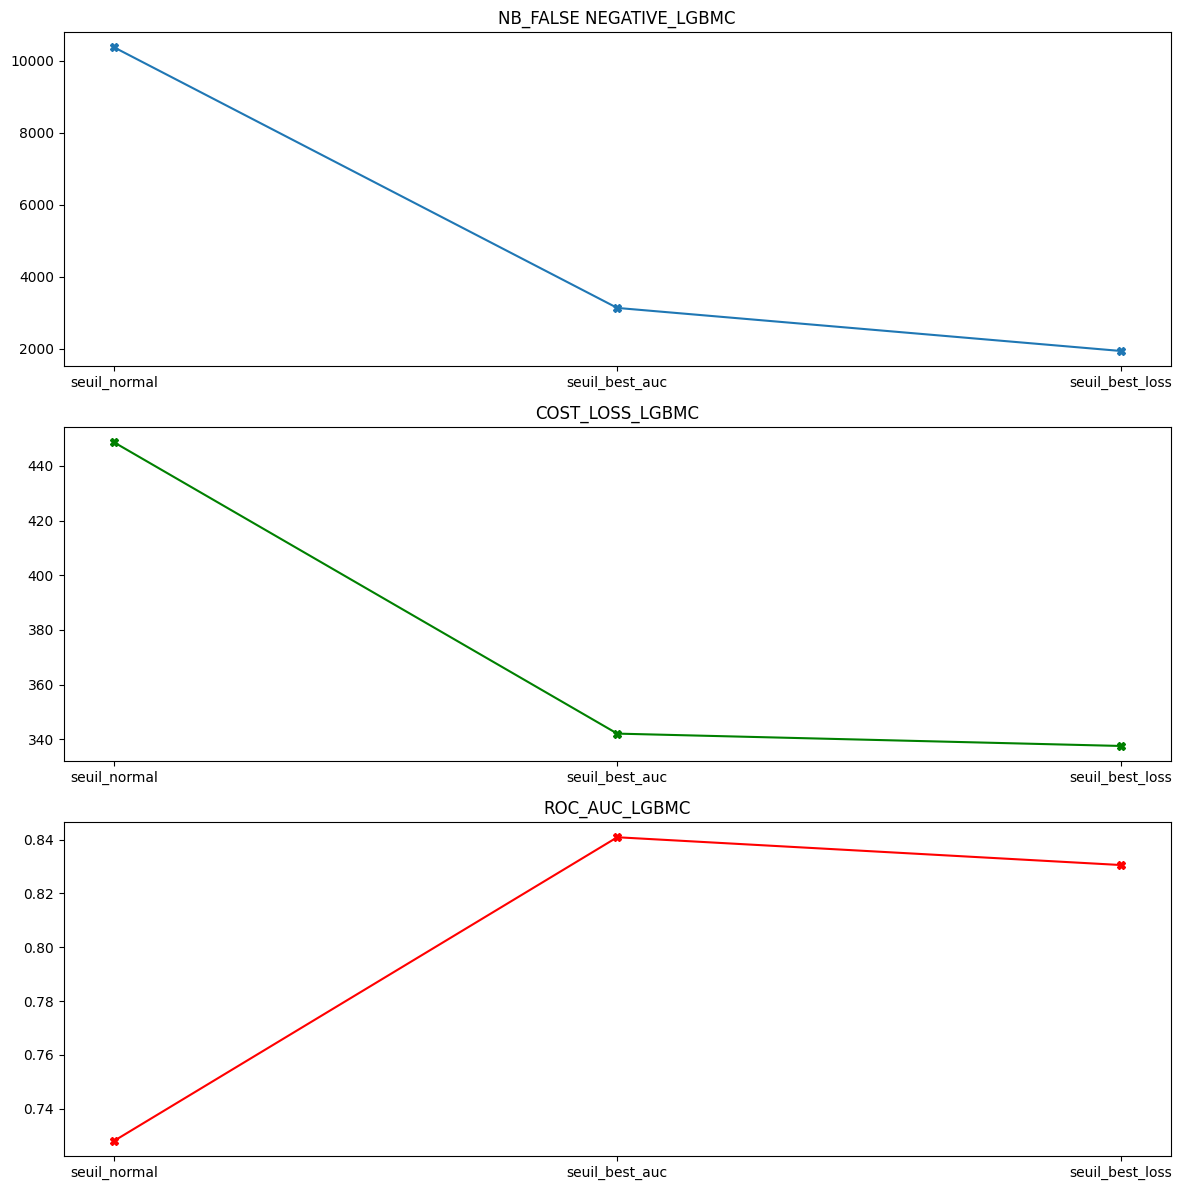

In [35]:
# grahipques
plt.rcParams["figure.figsize"] = (12,12)
# Courbe seuil et AUC
plt.subplot(311)
plt.plot(df_LGBMC_loss_auc.loc["FN"], marker = "X")
plt.title("NB_FALSE NEGATIVE_LGBMC")
# Courbe seuil et cost_loss
plt.subplot(312)
plt.plot(df_LGBMC_loss_auc.loc["cost_loss"], color = "green", marker = "X")
plt.title("COST_LOSS_LGBMC")
# Courbe seuil et roc_auc
plt.subplot(313)
plt.plot(df_LGBMC_loss_auc.loc["roc_auc"], color = "red", marker = "X")
plt.title("ROC_AUC_LGBMC")
plt.tight_layout()
plt.show()

#### DTREE CLASSIFIER

In [979]:
# DecisionTreeclassifier
# Modèle
model_Dtree = make_pipeline(SMOTE(),DecisionTreeClassifier(random_state = 0, 
                                                   min_samples_leaf = 1, 
                                                   min_samples_split = 2))
# Training
T0 = time.time()
model_Dtree.fit(X_train,y_train)
# Prédiction
y_pred_Dtree_proba = model_Dtree.predict_proba(X_train)
TTot_Dtree = time.time()-T0

In [980]:
# Mise en place du seuil
seuils_list = np.arange(0,1,0.01)
# Prédiction set de train
y_pred_Dtree_proba_one = y_pred_Dtree_proba[:,1]
# Mise en place de dictionnaires seuil et valeurs métriques
cost_dico = {}
auc_dico = {}
for seuil in seuils_list :
        y_pred_temp = (y_pred_Dtree_proba_one> seuil).astype(int)  
        # définition des des variables
        cm = confusion_matrix(y_train,y_pred_temp)
        FP = np.abs(cm[0,1])
        FN = np.abs(cm[1,0])
        TP = np.abs(cm[1,1])
        TN = np.abs(cm[0,0])
        cost = ((2*FP) + (20*FN) + TP + TN)/1000
        roc_auc = roc_auc_score(y_train, y_pred_temp)
        cost_dico[seuil] = cost
        auc_dico[seuil] = roc_auc

In [981]:
# Seuil et valeurs
min_cost_loss_Dtree = min(cost_dico.values())
for key,value in cost_dico.items():
    if value == min_cost_loss_Dtree :
        seuil_cost_loss_Dtree = key
        
max_auc_score_Dtree = max(auc_dico.values())
for key,value in auc_dico.items():
    if value == max_auc_score_Dtree :
        seuil_max_auc_score_Dtree = key
        
print(f"valeur min cost_loss : {min_cost_loss_Dtree}, seuil : {seuil_cost_loss_Dtree}")
print(f"valeur max_auc_score_Dtree : {max_auc_score_Dtree}, seuil : {seuil_max_auc_score_Dtree}")

valeur min cost_loss : 246.008, seuil : 0.99
valeur max_auc_score_Dtree : 1.0, seuil : 0.99


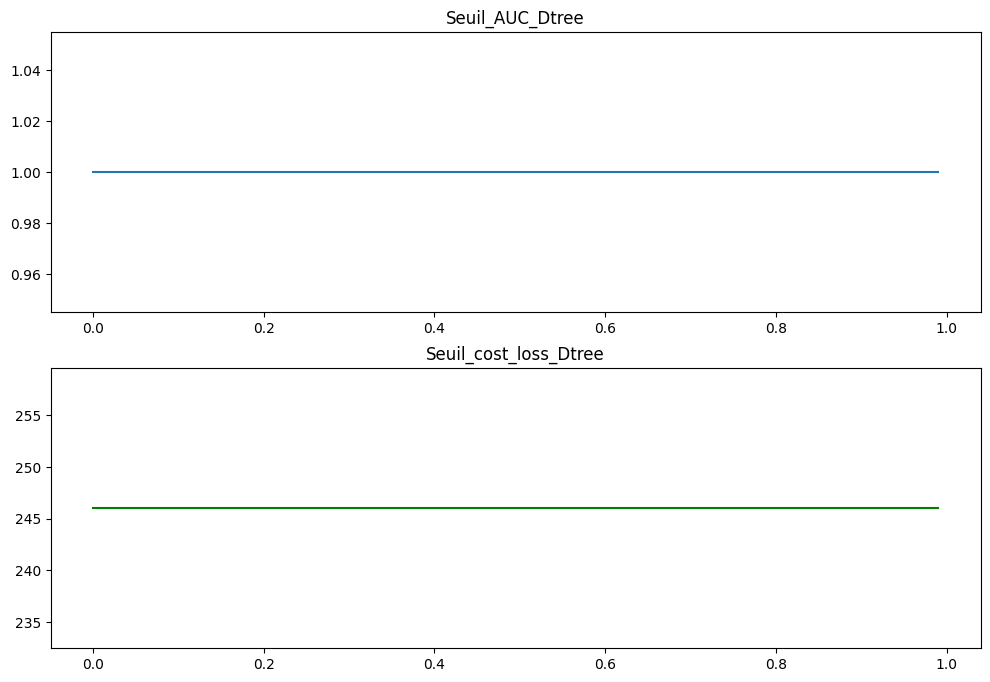

In [982]:
# garhipques
plt.rcParams["figure.figsize"] = (12,8)
# Courbe seuil et AUC
plt.subplot(211)
plt.plot(pd.DataFrame.from_dict(auc_dico, orient = "index"))
plt.title("Seuil_AUC_Dtree")
# Courbe seuil et cost_loss
plt.subplot(212)
plt.plot(pd.DataFrame.from_dict(cost_dico, orient = "index"), color = "green")
plt.title("Seuil_cost_loss_Dtree")
plt.show()

In [983]:
# Comparatif des AUC & loss_score en fonction des seuils

# Seuil Normal 
seuil_normal = 0.5
y_pred_temp_normal = (y_pred_Dtree_proba_one > seuil_normal).astype(int)  
# définition des des variables
cm_normal = confusion_matrix(y_train,y_pred_temp_normal)
FP_normal = np.abs(cm_normal[0,1])
FN_normal = np.abs(cm_normal[1,0])
TP_normal = np.abs(cm_normal[1,1])
TN_normal = np.abs(cm_normal[0,0])
cost_normal = ((2*FP_normal) + (20*FN_normal) + TP_normal + TN_normal)/1000
roc_auc_normal = roc_auc_score(y_train, y_pred_temp_normal)

# Seuil best AUC 
y_pred_temp_best_auc = (y_pred_Dtree_proba_one > seuil_max_auc_score_Dtree).astype(int)  
# définition des des variables
cm_best_auc = confusion_matrix(y_train,y_pred_temp_best_auc)
FP_best_auc = np.abs(cm_best_auc[0,1])
FN_best_auc = np.abs(cm_best_auc[1,0])
TP_best_auc = np.abs(cm_best_auc[1,1])
TN_best_auc = np.abs(cm_best_auc[0,0])
cost_best_auc = ((2*FP_best_auc) + (20*FN_best_auc) + TP_best_auc + TN_best_auc)/1000
roc_auc_best_auc = roc_auc_score(y_train, y_pred_temp_best_auc)

# Seuil best loss_score
y_pred_temp_best_loss = (y_pred_Dtree_proba_one > seuil_cost_loss_Dtree).astype(int)  
# définition des des variables
cm_best_loss = confusion_matrix(y_train,y_pred_temp_best_loss)
FP_best_loss = np.abs(cm_best_loss[0,1])
FN_best_loss = np.abs(cm_best_loss[1,0])
TP_best_loss = np.abs(cm_best_loss[1,1])
TN_best_loss = np.abs(cm_best_loss[0,0])
cost_best_loss = ((2*FP_best_loss) + (20*FN_best_loss) + TP_best_loss + TN_best_loss)/1000
roc_auc_best_loss = roc_auc_score(y_train, y_pred_temp_best_loss)

In [984]:
# Dataframe avec seuils
df_Dtree_loss_auc = pd.DataFrame(([seuil_normal, seuil_max_auc_score_Dtree, seuil_cost_loss_Dtree],
              [FP_normal, FP_best_auc, FP_best_loss],
              [FN_normal, FN_best_auc, FN_best_loss],
              [TP_normal, TP_best_auc, TP_best_loss],
              [TN_normal, TN_best_auc, TN_best_loss],
              [roc_auc_normal, roc_auc_best_auc, roc_auc_best_loss],
              [cost_normal, cost_best_auc,cost_best_loss]),
              columns = ["seuil_normal","seuil_best_auc","seuil_best_loss"],
              index= ["seuils","FP", "FN", "TP", "TN", "roc_auc", "cost_loss"])

In [985]:
df_Dtree_loss_auc

,seuil_normal,seuil_best_auc,seuil_best_loss
seuils,0.500,0.990,0.990
FP,0.000,0.000,0.000
FN,0.000,0.000,0.000
TP,19970.000,19970.000,19970.000
TN,226038.000,226038.000,226038.000
roc_auc,1.000,1.000,1.000
cost_loss,246.008,246.008,246.008


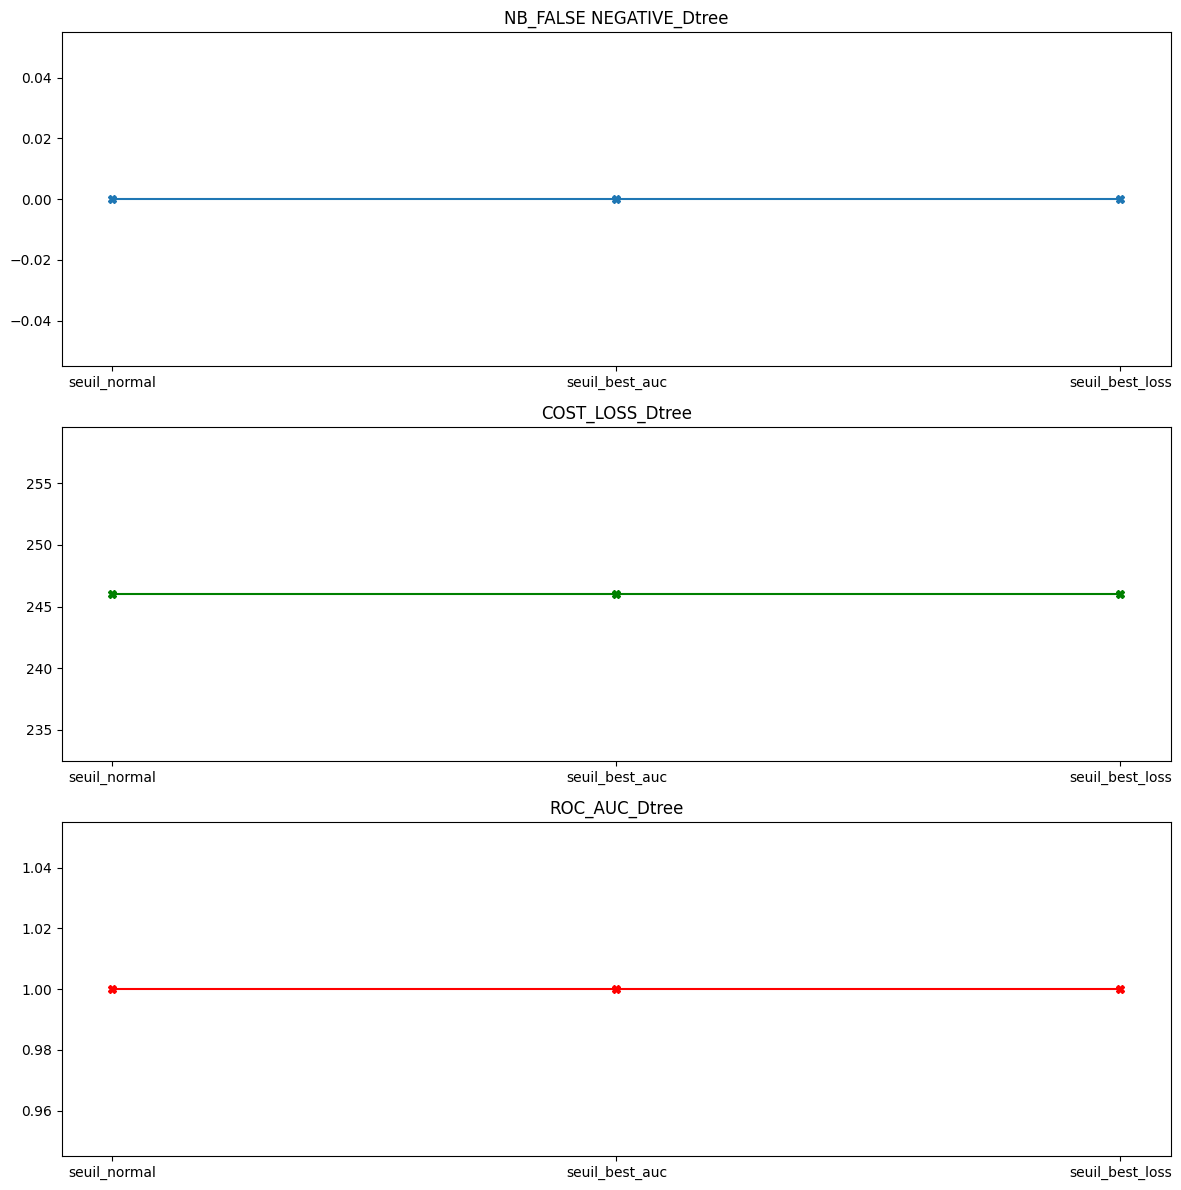

In [986]:
# grahipques
plt.rcParams["figure.figsize"] = (12,12)
# Courbe seuil et AUC
plt.subplot(311)
plt.plot(df_Dtree_loss_auc.loc["FN"], marker = "X")
plt.title("NB_FALSE NEGATIVE_Dtree")
# Courbe seuil et cost_loss
plt.subplot(312)
plt.plot(df_Dtree_loss_auc.loc["cost_loss"], color = "green", marker = "X")
plt.title("COST_LOSS_Dtree")
# Courbe seuil et roc_auc
plt.subplot(313)
plt.plot(df_Dtree_loss_auc.loc["roc_auc"], color = "red", marker = "X")
plt.title("ROC_AUC_Dtree")
plt.tight_layout()
plt.show()

In [988]:
df_dum_loss_auc

,seuil_normal,seuil_best_auc,seuil_best_loss
seuils,0.500,0.990,0.490
FP,0.000,0.000,226038.000
FN,19970.000,19970.000,0.000
TP,0.000,0.000,19970.000
TN,226038.000,226038.000,0.000
roc_auc,0.500,0.500,0.500
cost_loss,625.438,625.438,472.046


In [989]:
df_LR_loss_auc

,seuil_normal,seuil_best_auc,seuil_best_loss
seuils,0.500000,0.480000,0.370000
FP,63053.000000,68092.000000,100221.000000
FN,5825.000000,5322.000000,3234.000000
TP,14145.000000,14648.000000,16736.000000
TN,162985.000000,157946.000000,125817.000000
roc_auc,0.714682,0.716129,0.697338
cost_loss,419.736000,415.218000,407.675000


In [992]:
df_LGBMC_loss_auc

,seuil_normal,seuil_best_auc,seuil_best_loss
seuils,0.500000,0.110000,0.070000
FP,5104.000000,36664.000000,51013.000000
FN,10689.000000,3441.000000,2412.000000
TP,9281.000000,16529.000000,17558.000000
TN,220934.000000,189374.000000,175025.000000
roc_auc,0.721083,0.832744,0.826768
cost_loss,454.203000,348.051000,342.849000


In [1009]:
df_Dtree_loss_auc

,seuil_normal,seuil_best_auc,seuil_best_loss
seuils,0.500,0.990,0.990
FP,0.000,0.000,0.000
FN,0.000,0.000,0.000
TP,19970.000,19970.000,19970.000
TN,226038.000,226038.000,226038.000
roc_auc,1.000,1.000,1.000
cost_loss,246.008,246.008,246.008


### III.4.3) Expérimentation cots loss function et seuils optimisés

In [1031]:
# DummyClassifier
# seuil
seuil = 0.490
# Modèle
T0 = time.time()
model_dum = make_pipeline(SMOTE(),DummyClassifier(random_state = 0, 
                                                    strategy = "uniform"))
# Training
model_dum.fit(X_train,y_train)
# Prédiction avec probabilités
y_pred_dum_proba = model_dum.predict_proba(X_test)
y_pred_dum_proba_one = y_pred_dum_proba[:,1]
y_pred_dum = (y_pred_dum_proba_one > seuil).astype(int)

TTot_dum = time.time()-T0
# metriques
accuracy_dum = accuracy_score(y_test, y_pred_dum)
auc_dum = roc_auc_score(y_test, y_pred_dum)
matrix_confusion_dum = confusion_matrix(y_test, y_pred_dum, labels = model_dum.classes_)
FP_dum = np.abs(matrix_confusion_dum[0,1])
FN_dum = np.abs(matrix_confusion_dum[1,0])
TP_dum = np.abs(matrix_confusion_dum[1,1])
TN_dum = np.abs(matrix_confusion_dum[0,0])
cost_dum = ((2*FP_dum) + (20*FN_dum) + TP_dum + TN_dum)/1000

In [1032]:
accuracy_dum

0.0789392387363218

In [1033]:
auc_dum

0.5

In [1034]:
cost_dum

118.151

In [1035]:
FN_dum

0

In [1036]:
TTot_dum

0.765183687210083

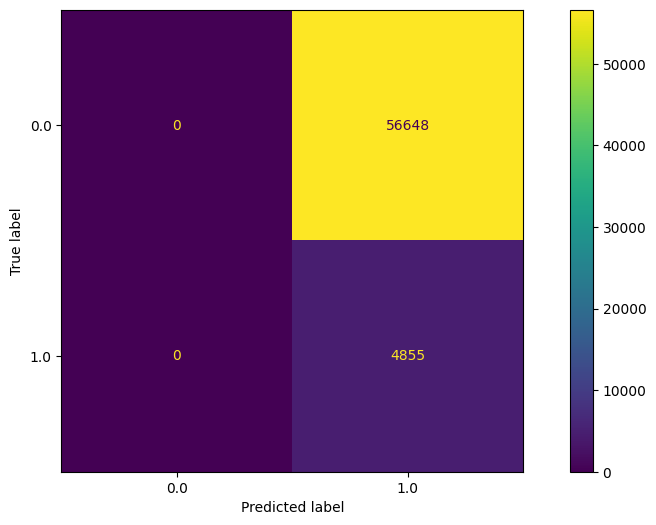

In [1037]:
plt.rcParams["figure.figsize"] = [12,6]
disp = ConfusionMatrixDisplay(matrix_confusion_dum, 
                              display_labels = model_dum.classes_)
disp.plot()

In [1078]:
mlflow.set_experiment("DummyClassifier_costloss_seuil")

<Experiment: artifact_location='mlflow-artifacts:/446787519004439790', creation_time=1704830677995, experiment_id='446787519004439790', last_update_time=1704830677995, lifecycle_stage='active', name='DummyClassifier_costloss_seuil', tags={}>

In [1079]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'strategy' : 'uniform'})
    mlflow.log_params({'random_state' : 0})
    mlflow.log_params({'seuil' : 0.490})

    # Log the loss metric
    mlflow.log_metric('cost_loss', cost_dum)
    mlflow.log_metric('roc_auc', auc_dum)
    mlflow.log_metric('false_negative',FN_dum)
    mlflow.log_metric('durée', TTot_dum)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "DummyClassifier_P7_AF_costloss_seuil")

    # Infer the model signature
    signature = infer_signature(X_train, model_dum.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model = model_dum,
        artifact_path="model_dum",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_dum_costloss_seuil")

Registered model 'model_dum_costloss_seuil' already exists. Creating a new version of this model...
2024/01/09 22:33:11 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_dum_costloss_seuil, version 5
Created version '5' of model 'model_dum_costloss_seuil'.


In [1039]:
# LogisticRegression
seuil = 0.37
# Modèle
model_LR = make_pipeline(SMOTE(),LogisticRegression(random_state = 0, 
                                                    max_iter = 100, 
                                                    penalty = None))
# Training
T0 = time.time()
model_LR.fit(X_train,y_train)
# Prédiction
y_pred_LR_proba = model_LR.predict_proba(X_test)
y_pred_LR_proba_one = y_pred_LR_proba[:,1]
y_pred_LR = (y_pred_LR_proba_one > seuil).astype(int)

TTot_LR = time.time()-T0
# metriques
accuracy_LR = accuracy_score(y_test, y_pred_LR)
auc_LR = roc_auc_score(y_test, y_pred_LR)
matrix_confusion_LR = confusion_matrix(y_test, y_pred_LR, labels = model_LR.classes_)
FP_LR = np.abs(matrix_confusion_LR[0,1])
FN_LR = np.abs(matrix_confusion_LR[1,0])
TP_LR = np.abs(matrix_confusion_LR[1,1])
TN_LR = np.abs(matrix_confusion_LR[0,0])
cost_LR = ((2*FP_LR) + (20*FN_LR) + TP_LR + TN_LR)/1000

In [1040]:
accuracy_LR

0.5759068663317236

In [1041]:
auc_LR

0.6915329399354331

In [1042]:
cost_LR

102.544

In [1043]:
FN_LR

831

In [1044]:
TTot_LR

1.2532365322113037

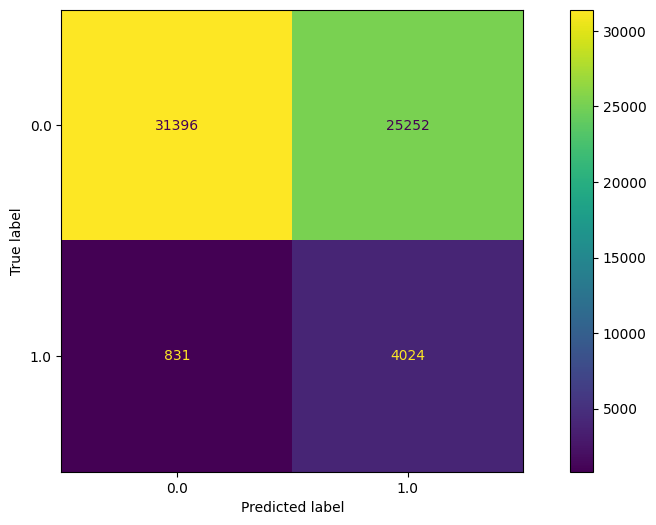

In [1045]:
plt.rcParams["figure.figsize"] = [12,6]
disp = ConfusionMatrixDisplay(matrix_confusion_LR, 
                              display_labels = model_LR.classes_)
disp.plot()

In [1080]:
mlflow.set_experiment("LogisticRegression_costloss_seuil")

<Experiment: artifact_location='mlflow-artifacts:/707554493095504690', creation_time=1704831365212, experiment_id='707554493095504690', last_update_time=1704831365212, lifecycle_stage='active', name='LogisticRegression_costloss_seuil', tags={}>

In [1081]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters

    mlflow.log_params({'max_iter' : 100})
    mlflow.log_params({'random_state' : 0})
    mlflow.log_params({'penalty' : None})
    mlflow.log_params({'seuil' : 0.37})

    # Log the loss metric
   
    mlflow.log_metric('cost_loss', cost_LR)
    mlflow.log_metric('roc_auc', auc_LR)
    mlflow.log_metric('false_negative',FN_LR)
    mlflow.log_metric('durée', TTot_LR)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "LogisticRegression_P7_AF_costloss_seuil")

    # Infer the model signature
    signature = infer_signature(X_train, model_LR.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model = model_LR,
        artifact_path="model_LR",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_LR_costloss_seuil")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'model_LR_costloss_seuil' already exists. Creating a new version of this model...
2024/01/09 22:33:47 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_LR_costloss_seuil, version 3
Created version '

In [27]:
# LGBMClassifier
seuil = 0.07
# Modèle
model_LGBMC = make_pipeline(SMOTE(),LGBMClassifier(random_state = 0, 
                                                   learning_rate = 0.9, 
                                                   n_estimators = 150))
# Training
T0 = time.time()
model_LGBMC.fit(X_train,y_train)
# Prédiction
y_pred_LGBMC_proba = model_LGBMC.predict_proba(X_test)
y_pred_LGBMC_proba_one = y_pred_LGBMC_proba[:,1]
y_pred_LGBMC = (y_pred_LGBMC_proba_one > seuil).astype(int)

TTot_LGBMC = time.time()-T0
# metriques
accuracy_LGBMC = accuracy_score(y_test, y_pred_LGBMC)
auc_LGBMC = roc_auc_score(y_test, y_pred_LGBMC)
matrix_confusion_LGBMC = confusion_matrix(y_test, y_pred_LGBMC, labels = model_LGBMC.classes_)
FP_LGBMC = np.abs(matrix_confusion_LGBMC[0,1])
FN_LGBMC = np.abs(matrix_confusion_LGBMC[1,0])
TP_LGBMC = np.abs(matrix_confusion_LGBMC[1,1])
TN_LGBMC = np.abs(matrix_confusion_LGBMC[0,0])
cost_LGBMC = ((2*FP_LGBMC) + (20*FN_LGBMC) + TP_LGBMC + TN_LGBMC)/1000

[LightGBM] [Info] Number of positive: 226038, number of negative: 226038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 452076, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [28]:
accuracy_LGBMC

0.7640765491114254

In [29]:
auc_LGBMC

0.7791806277689197

In [30]:
cost_LGBMC

93.743

In [31]:
FN_LGBMC

985

In [32]:
TTot_LGBMC

2.8455190658569336

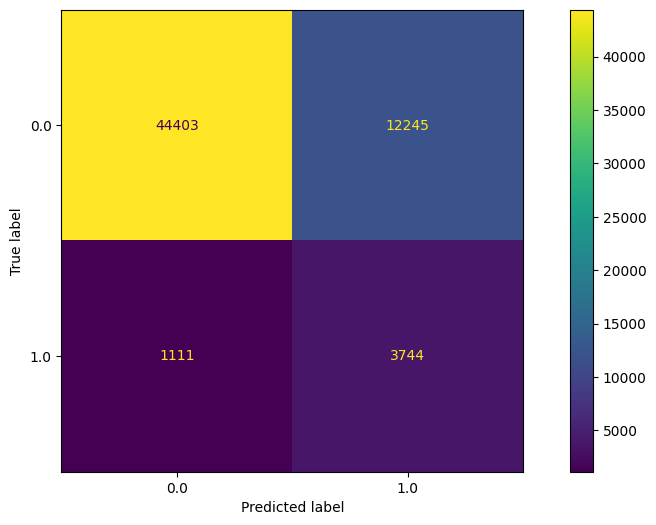

In [42]:
plt.rcParams["figure.figsize"] = [12,6]
disp = ConfusionMatrixDisplay(matrix_confusion_LGBMC, 
                              display_labels = model_LGMBC.classes_)
disp.plot()

In [1082]:
mlflow.set_experiment("LGMBC_costloss_seuil")

<Experiment: artifact_location='mlflow-artifacts:/933283761916267835', creation_time=1704833551960, experiment_id='933283761916267835', last_update_time=1704833551960, lifecycle_stage='active', name='LGMBC_costloss_seuil', tags={}>

In [1083]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'n_estimators' : 150})
    mlflow.log_params({'random_state' : 0})
    mlflow.log_params({'learning_rate' : 0.9})
    mlflow.log_params({'seuil' : 0.07})

    # Log the loss metric
    mlflow.log_metric('cost_loss', cost_LGBMC)
    mlflow.log_metric('roc_auc', auc_LGBMC)
    mlflow.log_metric('false_negative',FN_LGBMC)
    mlflow.log_metric('durée', TTot_LGBMC)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "LGMBC_P7_AF_costloss_seuil")

    # Infer the model signature
    signature = infer_signature(X_train, model_LGMBC.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model_LGMBC,
        artifact_path="model_LGMBC",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_LGMBC_costloss_seuil")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'model_LGMBC_costloss_seuil' already exists. Creating a new version of this model...
2024/01/09 22:34:26 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_LGMBC_costloss_seuil, version 2
Created ver

In [1069]:
# DecisionTreeclassifier
seuil = 0.9
# Modèle
model_Dtree = make_pipeline(SMOTE(),DecisionTreeClassifier(random_state = 0, 
                                                   min_samples_leaf = 1, 
                                                   min_samples_split = 2))
# Training
T0 = time.time()
model_Dtree.fit(X_train,y_train)
# Prédiction
y_pred_Dtree_proba = model_Dtree.predict_proba(X_test)
y_pred_Dtree_proba_one = y_pred_Dtree_proba[:,1]
y_pred_Dtree = (y_pred_Dtree_proba_one > seuil).astype(int)

TTot_Dtree = time.time()-T0
# metriques
accuracy_Dtree = accuracy_score(y_test, y_pred_Dtree)
auc_Dtree = roc_auc_score(y_test, y_pred_Dtree)
matrix_confusion_Dtree = confusion_matrix(y_test, y_pred_Dtree, labels = model_Dtree.classes_)
FP_Dtree = np.abs(matrix_confusion_Dtree[0,1])
FN_Dtree = np.abs(matrix_confusion_Dtree[1,0])
TP_Dtree = np.abs(matrix_confusion_Dtree[1,1])
TN_Dtree = np.abs(matrix_confusion_Dtree[0,0])
cost_Dtree = ((2*FP_Dtree) + (20*FN_Dtree) + TP_Dtree + TN_Dtree)/1000

In [1070]:
accuracy_Dtree

0.8570313643236915

In [1071]:
auc_Dtree

0.677384365131389

In [1072]:
cost_Dtree

117.132

In [1073]:
FN_Dtree

2602

In [1074]:
TTot_Dtree

26.254004955291748

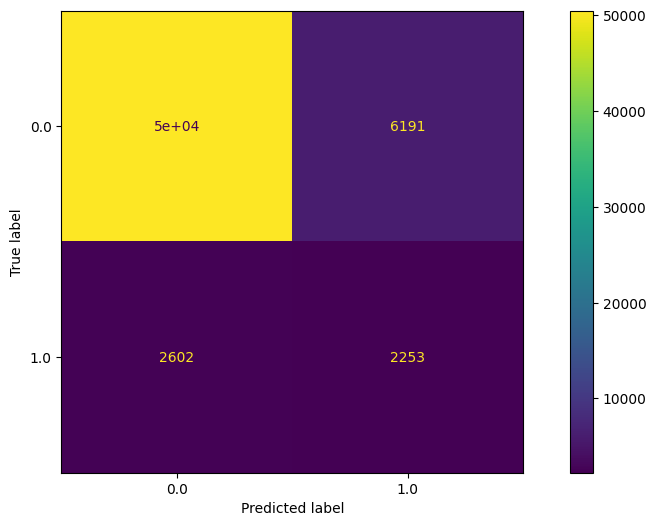

In [1075]:
plt.rcParams["figure.figsize"] = [12,6]
disp = ConfusionMatrixDisplay(matrix_confusion_Dtree, 
                              display_labels = model_Dtree.classes_)
disp.plot()

In [1076]:
mlflow.set_experiment("Dtree_costloss_seuil")

2024/01/09 22:31:05 INFO mlflow.tracking.fluent: Experiment with name 'Dtree_costloss_seuil' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/857946656047041740', creation_time=1704835865356, experiment_id='857946656047041740', last_update_time=1704835865356, lifecycle_stage='active', name='Dtree_costloss_seuil', tags={}>

In [1077]:
# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params({'min_samples_leaf' : 1})
    mlflow.log_params({'min_samples_split' : 2})
    mlflow.log_params({'seuil' : 0.9})

    # Log the loss metric
    mlflow.log_metric('cost_loss', cost_Dtree)
    mlflow.log_metric('roc_auc', auc_Dtree)
    mlflow.log_metric('false_negative',FN_Dtree)
    mlflow.log_metric('durée', TTot_Dtree)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Dtree_P7_AF_costloss_seuil")

    # Infer the model signature
    signature = infer_signature(X_train, model_Dtree.predict(X_test))
    
    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model_Dtree,
        artifact_path="model_Dtree",
        signature=signature,
        input_example=X_train,
        registered_model_name="model_Dtree_costloss_seuil")

C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\ARMAN\anaconda3\envs\projet_7_OC\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'model_Dtree_costloss_seuil'.
2024/01/09 22:31:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_Dtree_costloss_seuil, version 1
Created version '1' of model 'model_Dtree_costloss_se

### III.4.4) Choix du modèle

In [43]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

In [44]:
# courbe ROC et aires

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_LGBMC)
roc_auc_test = auc(fpr_test, tpr_test)

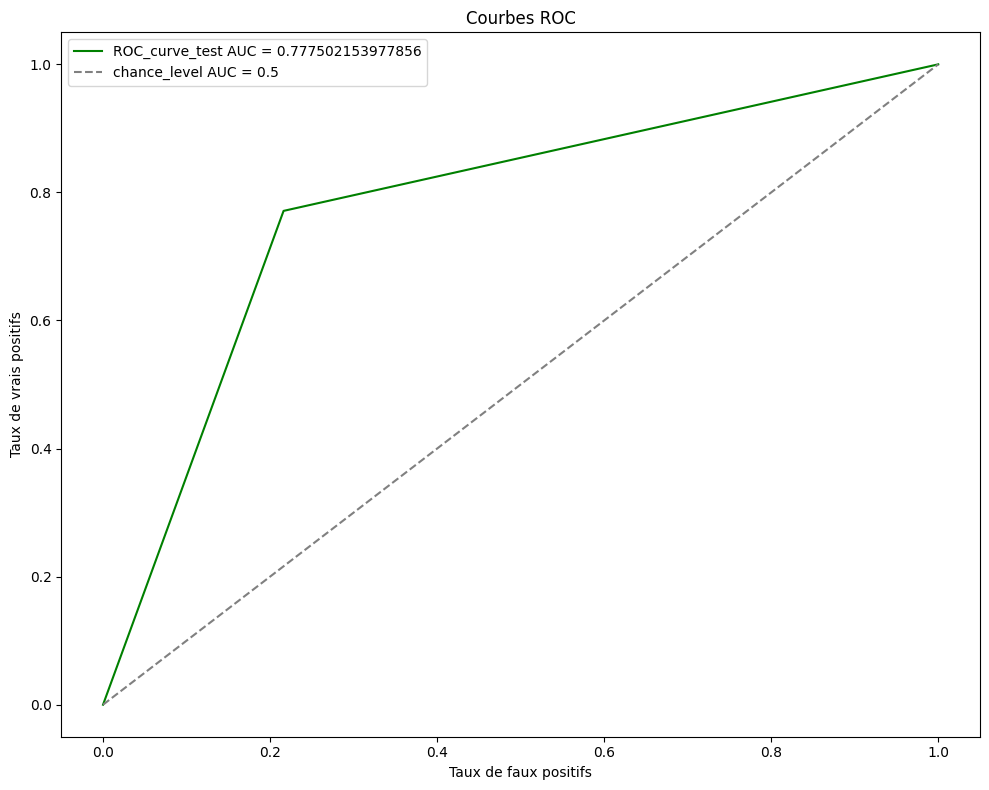

In [45]:
# Courbes ROC

plt.rcParams["figure.figsize"] = (10,8)

plt.plot(fpr_test, tpr_test, color = "green", 
         label = f"ROC_curve_test AUC = {roc_auc_test}")

plt.plot([0,1],[0,1], color = "grey", linestyle = "--",
        label = "chance_level AUC = 0.5")
plt.title("Courbes ROC")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend()
plt.tight_layout()
plt.show()

# IV) Interprétation du modèle

## IV.1) Globalement

In [46]:
from sklearn.inspection import permutation_importance

### IV.1.1) Selon roc_auc

In [47]:
r = permutation_importance(model_LGBMC,X_test,y_test,
                           n_repeats=10,
                           random_state=0,
                           scoring = "roc_auc")

In [48]:
dico_features_LGBMC = {}
dico_features_LGBMC["LGBMC"]=r["importances_mean"]

In [49]:
# dataframe résultats
df_modelLGBMC_features = pd.DataFrame(dico_features_LGBMC, index = features)
df_modelLGBMC_features = df_modelLGBMC_features.sort_values("LGBMC", ascending = False)
df_modelLGBMC_features

,LGBMC
EXT_SOURCE_1,0.152786
CREDIT_ACTIVE_Activesum,0.067837
CREDIT_TYPE_Microloansum,0.062046
DAYS_CREDIT_UPDATEmax,0.061985
EXT_SOURCE_3,0.053899
NAME_CONTRACT_STATUS_Refusedmedian_y,0.032389
DAYS_CREDITmax,0.032103
EXT_SOURCE_2,0.030008
DAYS_CREDITmean,0.029459
DAYS_FIRST_DRAWINGsum,0.027062


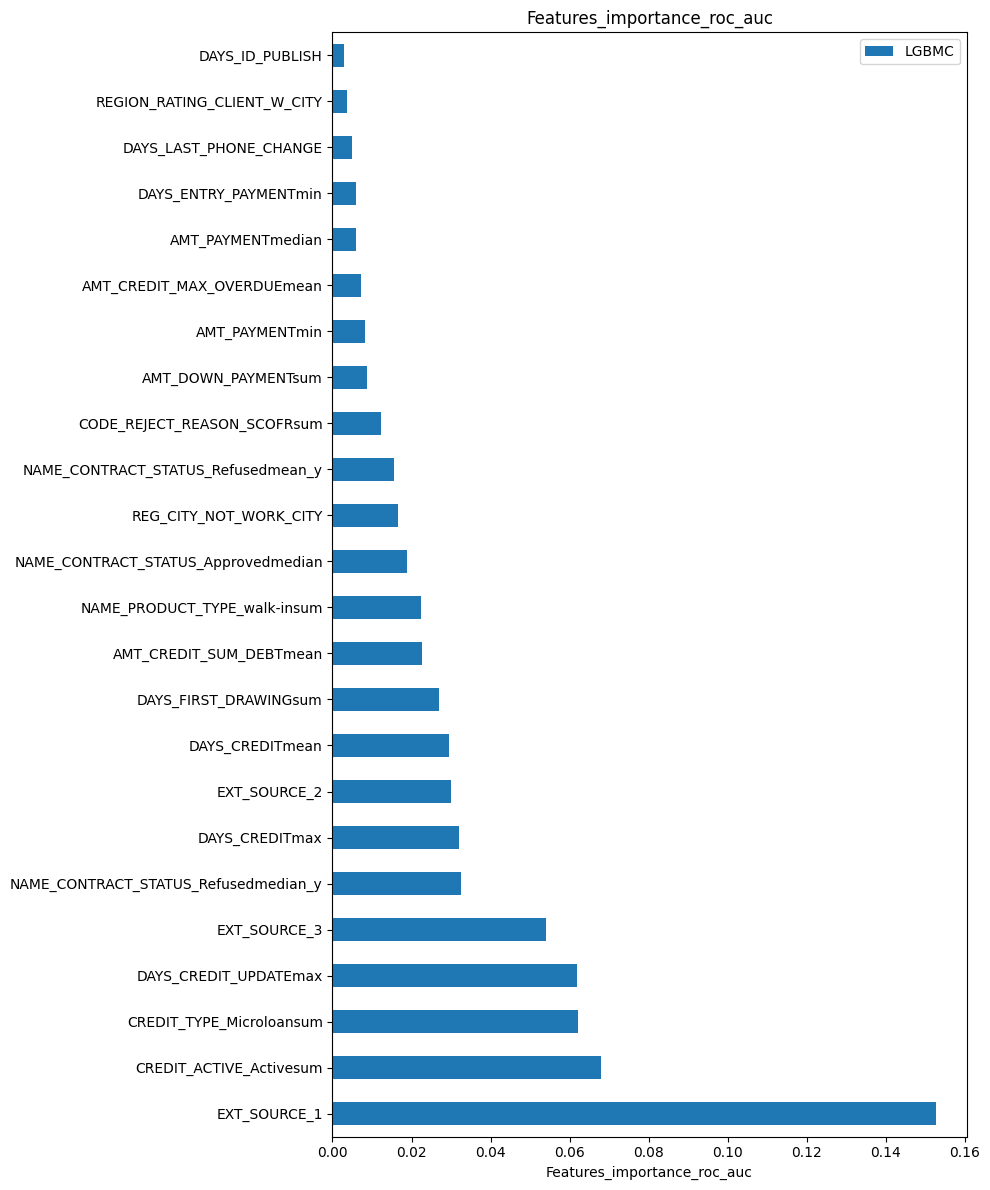

In [50]:
# graphique
plt.rcParams["figure.figsize"] = [10,12]
df_modelLGBMC_features.plot.barh()
plt.xlabel("Features_importance_roc_auc")
plt.axvline(x=0, color=".5")
plt.title("Features_importance_roc_auc")
plt.tight_layout()

In [51]:
score = {"AUC" : "roc_auc", "cost" : cost_loss}

### IV.1.2) Selon cost_loss

In [64]:
r = permutation_importance(model_LGBMC,X_test,y_test,
                           n_repeats=10,
                           random_state=0,
                           scoring = cost_loss)

In [53]:
dico_features_LGBMC = {}
dico_features_LGBMC["LGBMC"]=r["importances_mean"]

In [54]:
# dataframe résultats
df_modelLGBMC_features = pd.DataFrame(dico_features_LGBMC, index = features)
df_modelLGBMC_features = df_modelLGBMC_features.sort_values("LGBMC", ascending = False)
df_modelLGBMC_features

,LGBMC
EXT_SOURCE_1,10.3431
EXT_SOURCE_3,5.7576
EXT_SOURCE_2,4.6169
DAYS_CREDITmax,3.4890
CREDIT_ACTIVE_Activesum,3.0115
DAYS_CREDIT_UPDATEmax,2.7651
DAYS_CREDITmean,2.3557
CREDIT_TYPE_Microloansum,2.3147
AMT_CREDIT_SUM_DEBTmean,1.7763
REG_CITY_NOT_WORK_CITY,0.9846


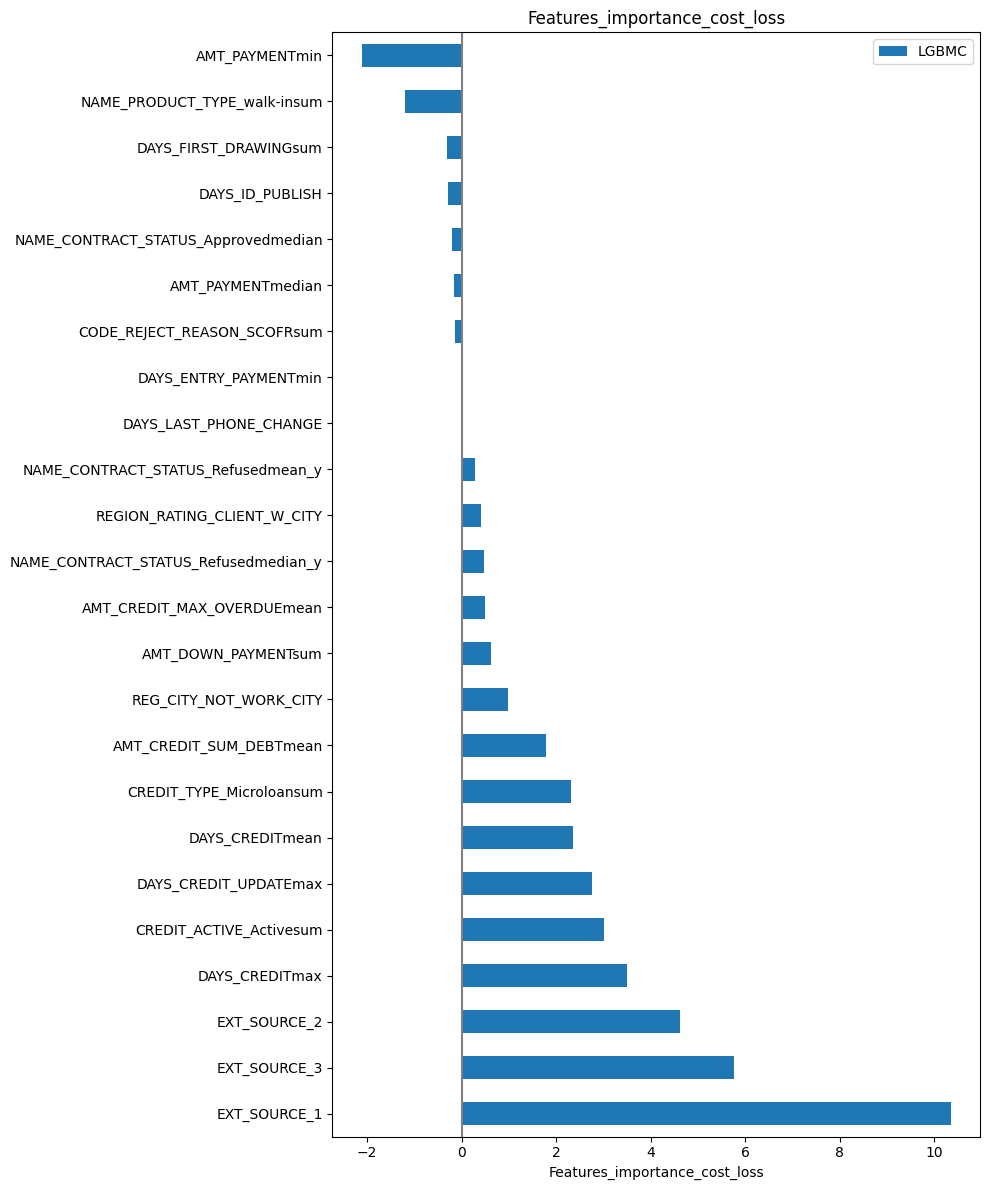

In [171]:
# graphique
plt.rcParams["figure.figsize"] = [10,12]
df_modelLGBMC_features.plot.barh()
plt.xlabel("Features_importance_cost_loss")
plt.axvline(x=0, color=".5")
plt.title("Features_importance_cost_loss")
plt.tight_layout()

## IV.2) Localement

In [60]:
# Importation de SHAP
import shap
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [102]:
explainer = shap.TreeExplainer(model_LGBMC[1])
shap_values = explainer.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


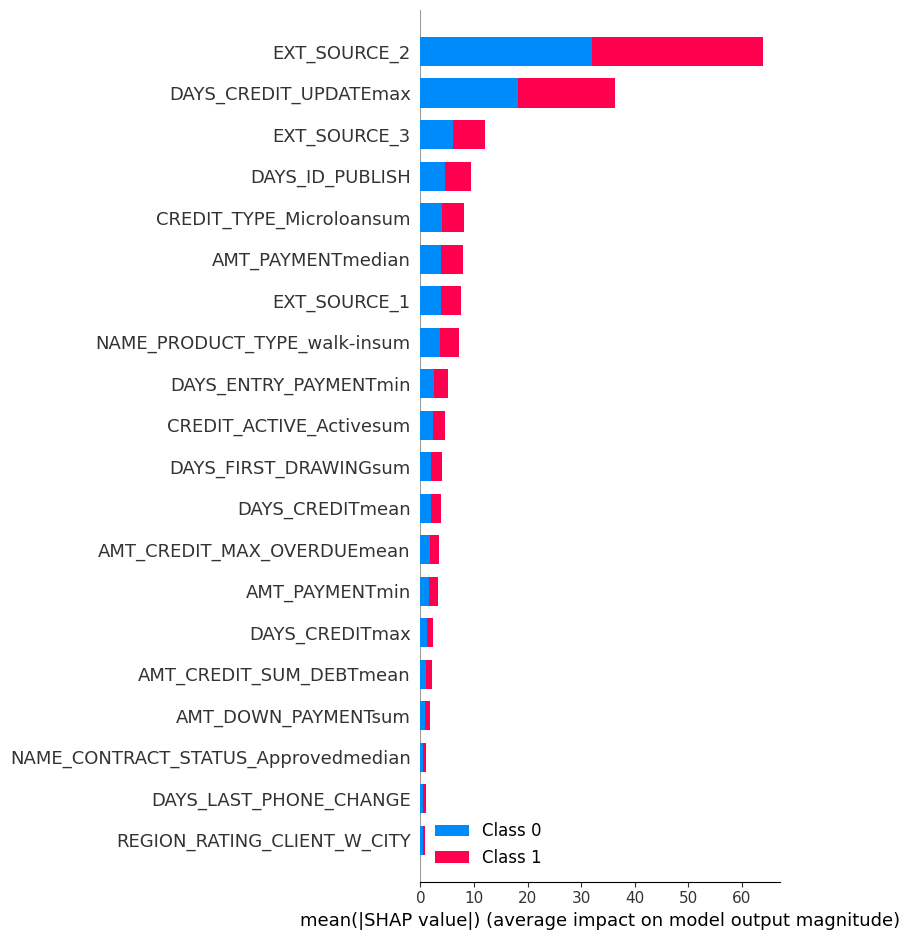

In [140]:
#plot the feature importance
shap.summary_plot(shap_values, features, plot_type="bar")

In [162]:
# Valeur de l'index
y_pred_LGBMC[0]

0

In [159]:
# Valeur de l'index
y_pred_LGBMC[2]

1

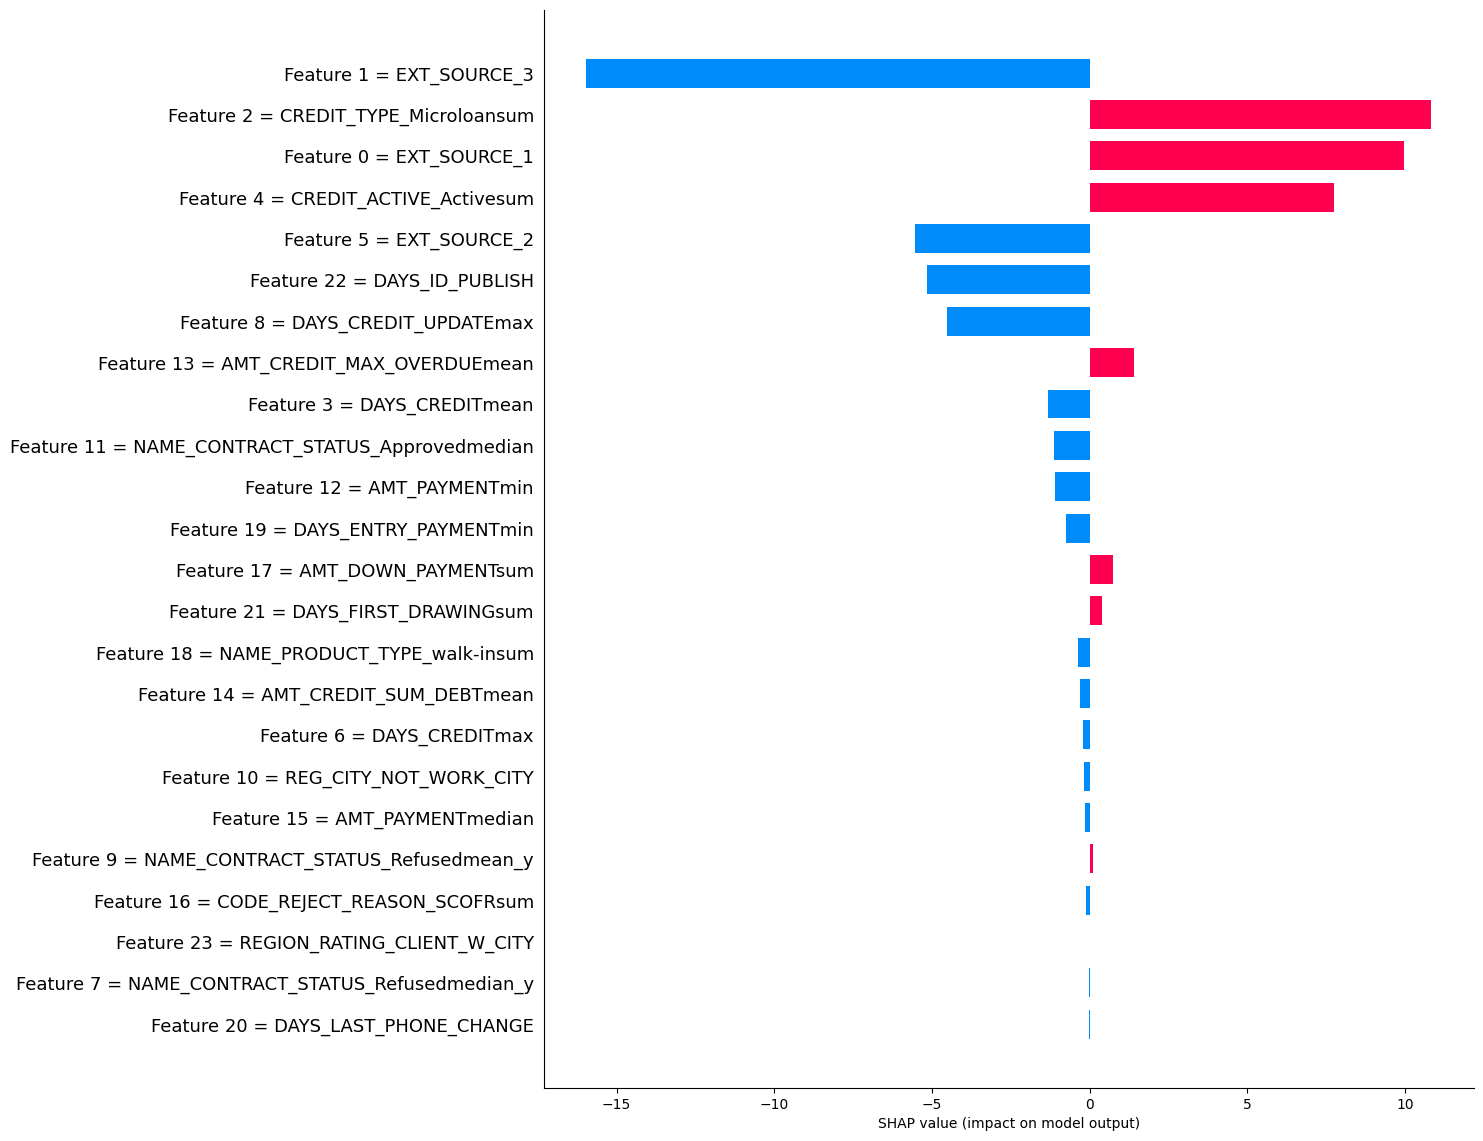

In [167]:
# Graphuique feature importance avec prédiction à 0 (solvable)
plt.rcParams["figure.figsize"] = [12,14]
shap.bar_plot(shap_values[0][0],
             features,
             max_display = len(features))

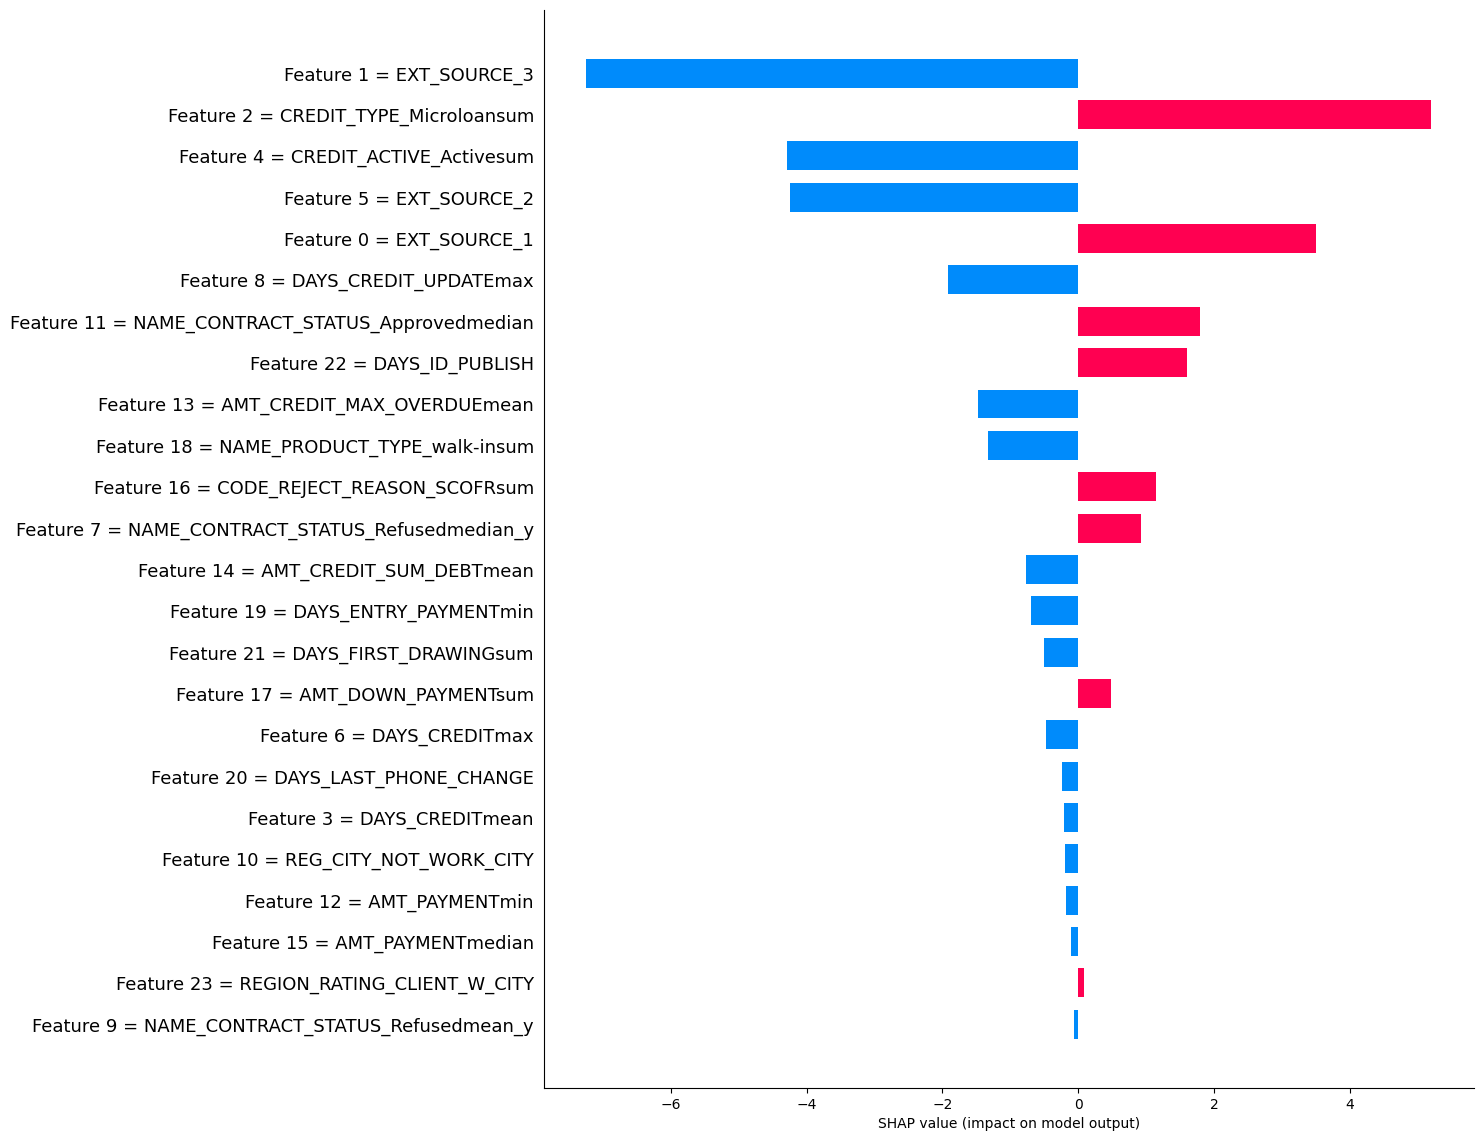

In [170]:
# Graphuique feature importance avec prédiction à 1 (pas solvable)
plt.rcParams["figure.figsize"] = [12,14]
shap.bar_plot(shap_values[0][2],
             features,
             max_display = len(features))

In [190]:
pd.DataFrame(shap_values[1], columns = features)

,EXT_SOURCE_1,EXT_SOURCE_3,CREDIT_TYPE_Microloansum,DAYS_CREDITmean,CREDIT_ACTIVE_Activesum,EXT_SOURCE_2,DAYS_CREDITmax,NAME_CONTRACT_STATUS_Refusedmedian_y,DAYS_CREDIT_UPDATEmax,NAME_CONTRACT_STATUS_Refusedmean_y,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_STATUS_Approvedmedian,AMT_PAYMENTmin,AMT_CREDIT_MAX_OVERDUEmean,AMT_CREDIT_SUM_DEBTmean,AMT_PAYMENTmedian,CODE_REJECT_REASON_SCOFRsum,AMT_DOWN_PAYMENTsum,NAME_PRODUCT_TYPE_walk-insum,DAYS_ENTRY_PAYMENTmin,DAYS_LAST_PHONE_CHANGE,DAYS_FIRST_DRAWINGsum,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY
0,-9.973581,15.973846,-10.832753,1.320687,-7.738040,5.548347,0.207172,0.018118,4.509000,-0.118182,0.171237,1.125962,1.089422,-1.404769,0.295555,0.137417,0.102625,-0.736297,0.371175,0.737321,0.011334,-0.393656,5.155780,-0.025617
1,-2.047242,-0.926750,-1.042176,-0.029691,-1.221732,9.365507,0.265277,0.013469,3.864616,-0.294269,0.072239,-0.091374,0.125397,-1.669164,0.449666,-1.645659,0.108465,0.400547,-0.971515,-0.155555,0.269386,-1.481467,0.243811,-1.042045
2,-3.497404,7.252198,-5.203074,0.214146,4.296410,4.239226,0.478855,-0.924665,1.917503,0.067797,0.188220,-1.788377,0.182091,1.468521,0.772801,0.112595,-1.149170,-0.481059,1.330615,0.696591,0.239349,0.501656,-1.597720,-0.089742
3,-1.438260,0.206749,-1.198523,0.181197,-1.717067,6.599643,-0.024187,-0.065677,4.028844,-0.021522,-0.769275,-0.095056,-0.042172,0.021381,0.286270,0.553294,0.135889,0.085653,-0.876027,-0.524779,-0.017360,-0.724305,0.437160,-0.079414
4,-2.765640,8.118025,-3.248211,-0.109422,-2.583262,5.561846,0.026915,0.112200,3.617279,-0.307250,0.184221,-0.263735,-0.083533,0.012469,0.535655,1.039203,0.086882,-0.665156,-0.321660,0.500606,-0.590022,-1.433685,-2.572652,-0.170662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,-1.530238,-2.051582,1.964824,1.026829,1.366053,11.635298,-0.600992,-0.050288,-2.558606,0.533649,-0.914947,-1.121036,-1.370339,0.447841,0.217422,-2.302250,0.112605,0.047799,0.097279,0.737763,-0.190349,-1.504821,1.209314,-0.226448
61499,-1.497869,0.019508,0.193805,0.611478,-1.549826,6.536607,-0.447517,-0.028456,3.063608,-0.285721,0.158703,-0.183911,-1.662863,-0.728968,0.294281,1.604851,0.093150,-0.097416,-0.734160,0.741504,0.131691,-1.243172,0.094448,-0.288762
61500,-1.591313,-0.659489,-1.066918,-0.571707,-1.834542,5.998549,0.074729,-0.023822,4.580883,-0.025212,0.145932,-0.120899,-0.544215,0.581422,0.200036,0.914314,0.130581,-0.141293,-0.752415,-0.435888,0.228284,-2.031210,-0.224118,0.384130
61501,-0.079317,-0.950570,-0.887597,-0.133670,-1.834583,14.439567,0.010871,-0.014784,-11.585746,-0.001089,0.400174,-0.175598,1.062275,-0.442129,0.025722,2.318118,0.122113,0.270659,-1.177332,-0.358873,0.321595,-1.512450,7.675300,-0.114125


# V) Serialization

## Avec joblib

In [199]:
from joblib import dump, load

In [202]:
dump(model_LGBMC, 'model_LGBMC_best.joblib')

['model_LGBMC_best.joblib']

## Avec MLFLOW

In [204]:
import mlflow.sklearn

In [205]:
signature = infer_signature(X_train, y_train)

In [206]:
mlflow.sklearn.save_model(model_LGBMC, 'mlflow_model', signature=signature)

2024/01/18 21:47:08 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: mlflow_model\model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.3.2', 'cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback.
